# mapas con las metricas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors as colors
import geopandas as gpd

In [2]:
folder = 'Z:\\1.Data\\Honduras\\results\\metrics\\'
geo_folder = 'Z:\\1.Data\\Honduras\\raw\\'
monthly_file='prec_metrics_monthly.csv'
overall_file='prec_metrics_overall.csv'
r10_monthly='r10_metrics_monthly.csv'
r15_monthly='r15_metrics_monthly.csv'
r10_overall='r10_metrics_overall.csv'
r15_overall='r15_metrics_overall.csv'
geo_file = 'groups_prec.csv'

In [3]:
prec = pd.read_csv(folder+overall_file).rename(
        columns={'Unnamed: 0':'estacion'})


r10_overall = pd.read_csv(folder+r10_overall).rename(
        columns={'Unnamed: 0':'estacion'})

r15_overall = pd.read_csv(folder+r15_overall).rename(
        columns={'Unnamed: 0':'estacion'})

In [4]:
geo=  pd.read_csv(geo_folder+geo_file).rename(
        columns={'Unnamed: 0':'estacion'})

In [5]:
info = prec.merge(geo, how='inner', on='estacion')
info_r10 = r10_overall.merge(geo, how='inner', on='estacion')
info_r15 = r15_overall.merge(geo, how='inner', on='estacion')

In [6]:
prueba = info[info['source']=='chirps'].reset_index(drop=True)

In [7]:
def map_country(country):
    
    # leer los datos de las fronteras de los países en formato shapefile
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # seleccionar solo las fronteras de Honduras
    hn = world.loc[world['iso_a3'] == country]


    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal')
    ax.set_xlim([-90, -83])
    ax.set_ylim([12.5, 16.5])
    # Ocultar los ejes x e y
    ax.set_axis_off()


    return hn.plot(ax=ax, edgecolor='gray', facecolor='white', linewidth=2)

In [8]:
def map_metric_discrete(country, df, metric):
    map_country(country)

    min_metric = df[metric].min()
    max_metric = df[metric].max()
    
    # Definir los intervalos y los colores para cada intervalo
    intervals = [0, 0.2, 0.4, 0.6, 1]
    colors_list = ['tomato', 'lightskyblue', 'limegreen', 'violet']
    
    # Crear el mapa de colores con los intervalos y colores definidos
    cmap = colors.ListedColormap(colors_list)
    norm = colors.BoundaryNorm(intervals, cmap.N)
    # plotear los puntos como círculos con un color que refleje la altitud
    for index, row in prueba.iterrows():
        color_index = norm(row[metric])
        plt.plot(row['Lon'], row['Lat'], marker='o', markersize=5,
                 color=cmap(color_index))

    # Crear el legend
    handles = []
    labels = []
    for i, interval in enumerate(intervals[:-1]):
        color = cmap(norm(interval))
        label = f"{interval:.1f} - {intervals[i+1]:.1f}"
        handles.append(plt.Line2D([], [], color=color, marker='o', markersize=5, linestyle='None'))
        labels.append(label)

    plt.legend(handles=handles, labels=labels, title='maape',bbox_to_anchor=(1.1, 1), loc='upper right')


    plt.title(f'{metric} metric')
    return plt.show()
    

In [9]:
def map_metric(country, df, metric, colors=plt.cm.Reds):
    map_country(country)
    min_metric = df[metric].min()
    max_metric = df[metric].max()

    for index, row in prueba.iterrows():
        plt.plot(row['Lon'], row['Lat'], marker='o', markersize=5,
                 color=colors(row[metric]))

    # agregar una barra de colores
    sm = plt.cm.ScalarMappable(cmap=colors,
                           norm=plt.Normalize(vmin=min_metric, vmax=max_metric))
    sm._A = []
    cbar = plt.colorbar(sm, orientation='horizontal', fraction=0.05, pad=0.04)
    cbar.ax.set_xlabel(metric)


    plt.title(f'{metric} metric')
    return plt.show()

C:\Users\djaimes\AppData\Local\Temp\ipykernel_22252\1884936465.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='horizontal', fraction=0.05, pad=0.04)


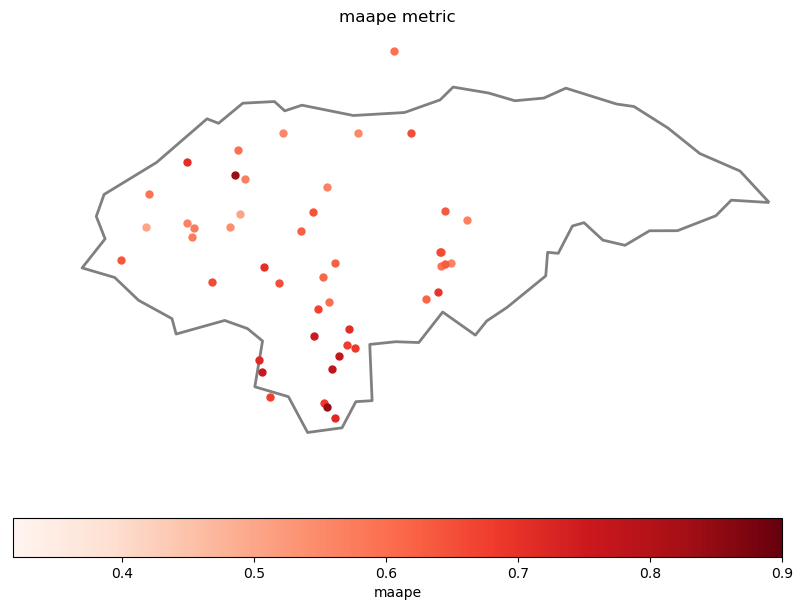

In [10]:
map_metric('HND', prueba, 'maape')

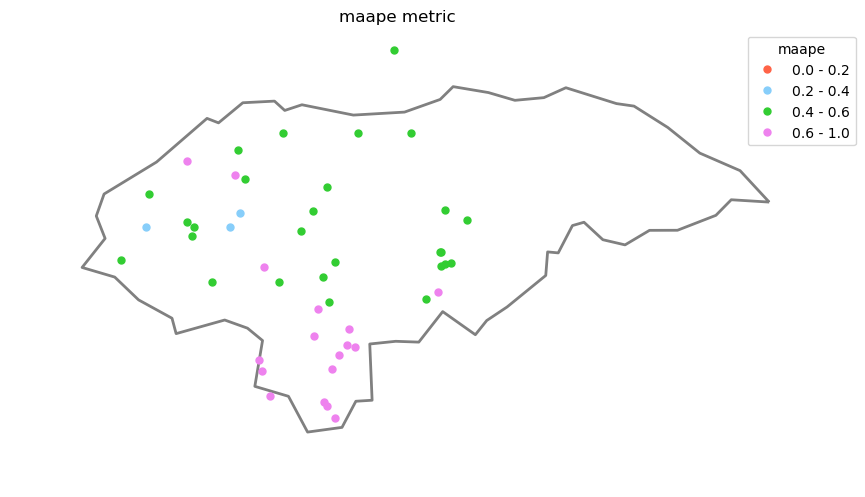

In [11]:
map_metric_discrete('HND', prueba, 'maape')

In [12]:
def map_metric_continuos(i, j,df, source, metric, colors=plt.cm.viridis):
    axs[i, j].set_aspect('equal')
    axs[i, j].set_title(f'{metric} metric for the {source} satellite source')
    axs[i, j].set_xlim([-91, -82])
    axs[i, j].set_ylim([12, 17])
    hn.plot(ax=axs[i, j], edgecolor='black', facecolor='white', linewidth=1.5)
    df_ = df[df['source']==source].reset_index(drop=True)

    min_metric = df_[metric].min()
    max_metric = df_[metric].max()

    for index, row in df_.iterrows():
        axs[i, j].plot(row['Lon'], row['Lat'], marker='o', markersize=5,
                    color=colors(row[metric]))
    sm_hn = plt.cm.ScalarMappable(cmap=colors,
                               norm=plt.Normalize(vmin=min_metric, vmax=max_metric))
    sm_hn._A = []
    cbar_hn = plt.colorbar(sm_hn, ax=axs[i, j], orientation='horizontal', fraction=0.05, pad=0.08)
    return cbar_hn.ax.set_xlabel(metric)

In [13]:
def map_metric_dicrete(i, j,df, source, metric, interval=[0, 0.2, 0.4, 0.6, 1, 1.2]):
    axs[i, j].set_aspect('equal')
    axs[i, j].set_title(f'{metric} metric for the {source} satellite source')
    axs[i, j].set_xlim([-91, -82])
    axs[i, j].set_ylim([12, 17])

    # Ocultar los ejes x e y
    axs[i, j].set_axis_off()
    hn.plot(ax=axs[i, j], edgecolor='black', facecolor='white', linewidth=1.5)
    df_ = df[df['source']==source].reset_index(drop=True)

    min_metric = df_[metric].min()
    max_metric = df_[metric].max()
    
    # Definir los intervalos y los colores para cada intervalo
    if len(interval)==5:
        intervals = interval
        colors_list = ['tomato','lightsalmon', 'lightskyblue', 'limegreen']
        cmap = colors.ListedColormap(colors_list)
        norm = colors.BoundaryNorm(intervals, cmap.N)
        
    if len(interval)==5 and metric=='maape':
        intervals = interval
        colors_list =  ['limegreen','lightskyblue','lightsalmon',  'tomato']
        cmap = colors.ListedColormap(colors_list)
        norm = colors.BoundaryNorm(intervals, cmap.N)
       

    
    for index, row in df_.iterrows():
        color_index = norm(row[metric])
        axs[i, j].plot(row['Lon'], row['Lat'], marker='o', markersize=5,
                    color=cmap(color_index))

    # Crear el legend
    handles = []
    labels = []
    for i, interval in enumerate(intervals[:-1]):
        color = cmap(norm(interval))
        label = f"{interval:.1f} - {intervals[i+1]:.1f}"
        handles.append(plt.Line2D([], [], color=color, marker='o', markersize=5, linestyle='None'))
        labels.append(label)
    if metric != 'maape':
        plt.legend(handles=handles, labels=['malo', 'bueno', 'regular', 'óptimo'], title=f'{metric} metric',bbox_to_anchor=(1.2, 1.8))
    else:
        plt.legend(handles=handles, labels=['óptimo', 'regular', 'bueno', 'malo'], title=f'{metric} metric',bbox_to_anchor=(1.2, 1.8))
        


# OVERALL

In [14]:
dataset=info
metric='r2_'
rank=[-np.inf, 0,  0.3, 0.6, 1]

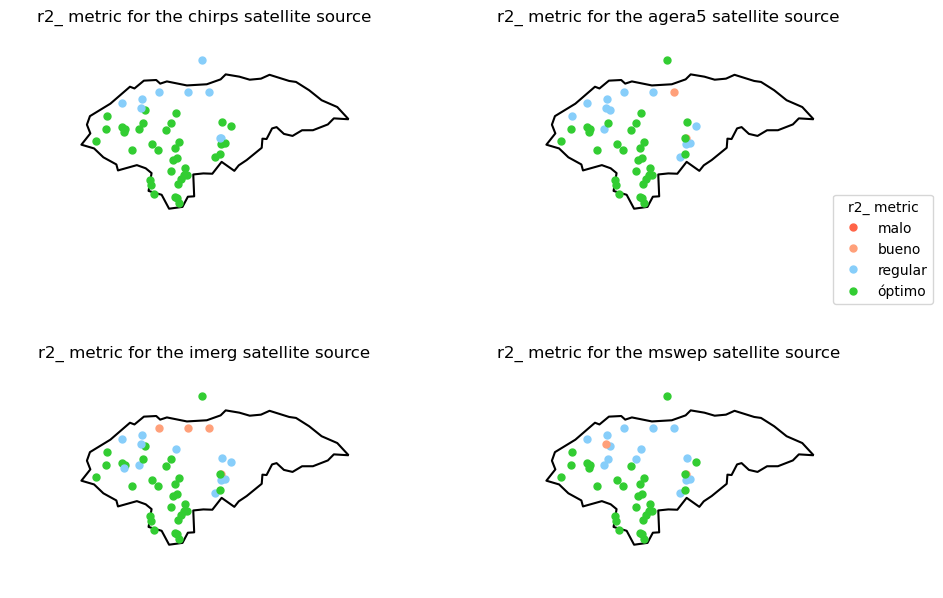

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(2, 2, figsize=(11, 8))

map_metric_dicrete(0, 0,dataset, 'chirps',metric,rank)
map_metric_dicrete(0, 1,dataset, 'agera5',metric, rank)
map_metric_dicrete(1, 0,dataset, 'imerg',metric, rank)
map_metric_dicrete(1, 1,dataset, 'mswep',metric, rank)

In [16]:
dataset=info_r10
metric='r2_'
rank= [-np.inf, 0,  0.3, 0.6, 1]

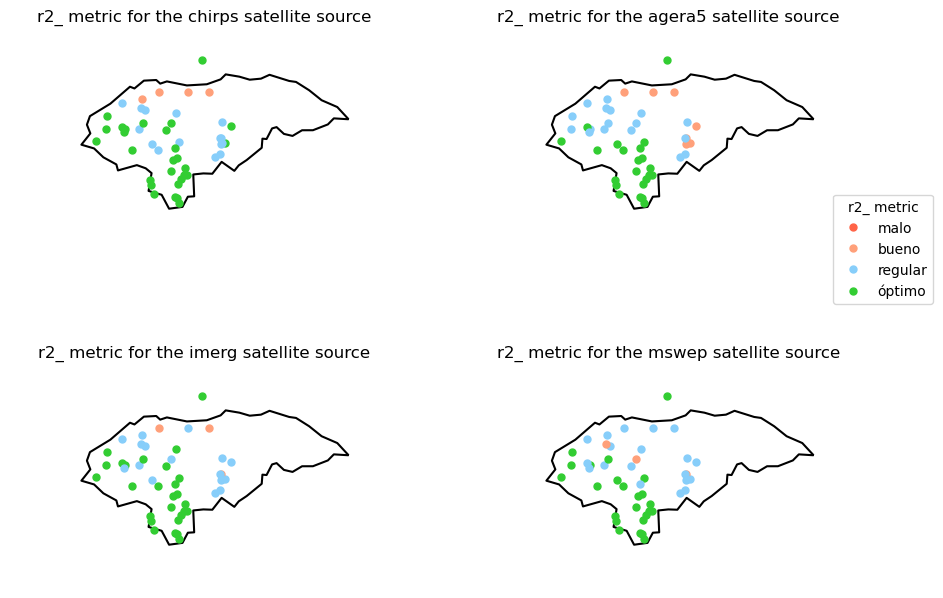

In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(2, 2, figsize=(11, 8))

map_metric_dicrete(0, 0,dataset, 'chirps',metric,rank)
map_metric_dicrete(0, 1,dataset, 'agera5',metric, rank)
map_metric_dicrete(1, 0,dataset, 'imerg',metric, rank)
map_metric_dicrete(1, 1,dataset, 'mswep',metric, rank)

In [18]:
dataset=info_r15
metric='r2_'
rank= [-np.inf, 0,  0.3, 0.6, 1]

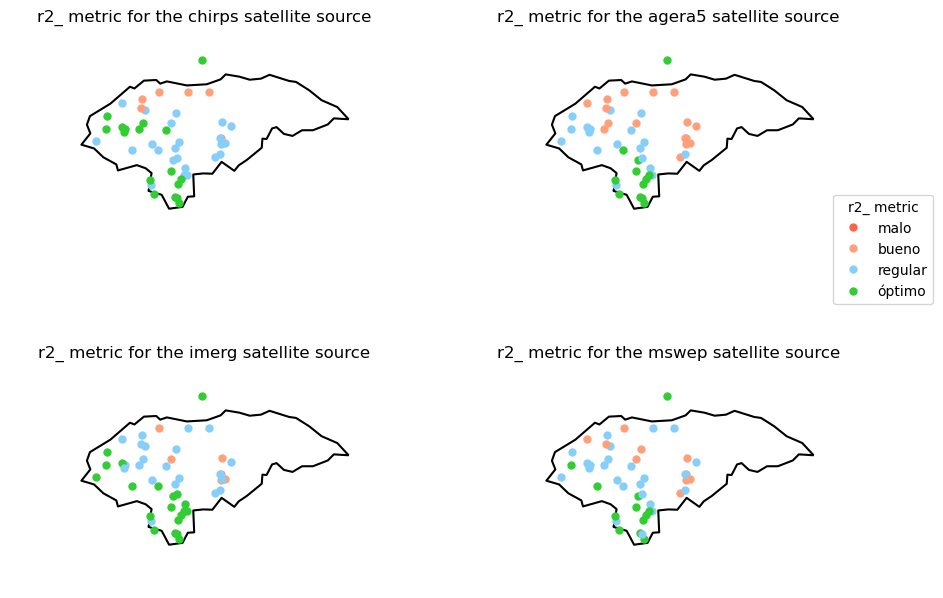

In [19]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(2, 2, figsize=(11, 8))

map_metric_dicrete(0, 0,dataset, 'chirps',metric,rank)
map_metric_dicrete(0, 1,dataset, 'agera5',metric, rank)
map_metric_dicrete(1, 0,dataset, 'imerg',metric, rank)
map_metric_dicrete(1, 1,dataset, 'mswep',metric, rank)

# kendall

In [20]:
dataset=info
metric='kendall'
rank=[0,  0.25, 0.5, 0.75,1]

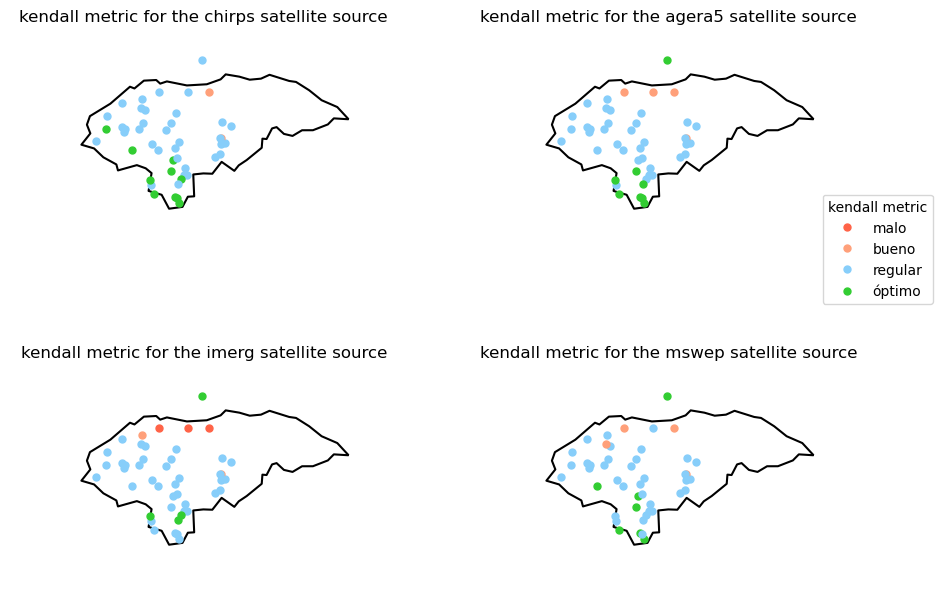

In [21]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(2, 2, figsize=(11, 8))

map_metric_dicrete(0, 0,dataset, 'chirps',metric,rank)
map_metric_dicrete(0, 1,dataset, 'agera5',metric, rank)
map_metric_dicrete(1, 0,dataset, 'imerg',metric, rank)
map_metric_dicrete(1, 1,dataset, 'mswep',metric, rank)

In [22]:
dataset=info_r10
metric='kendall'
rank=[0,  0.25, 0.5, 0.75,1]

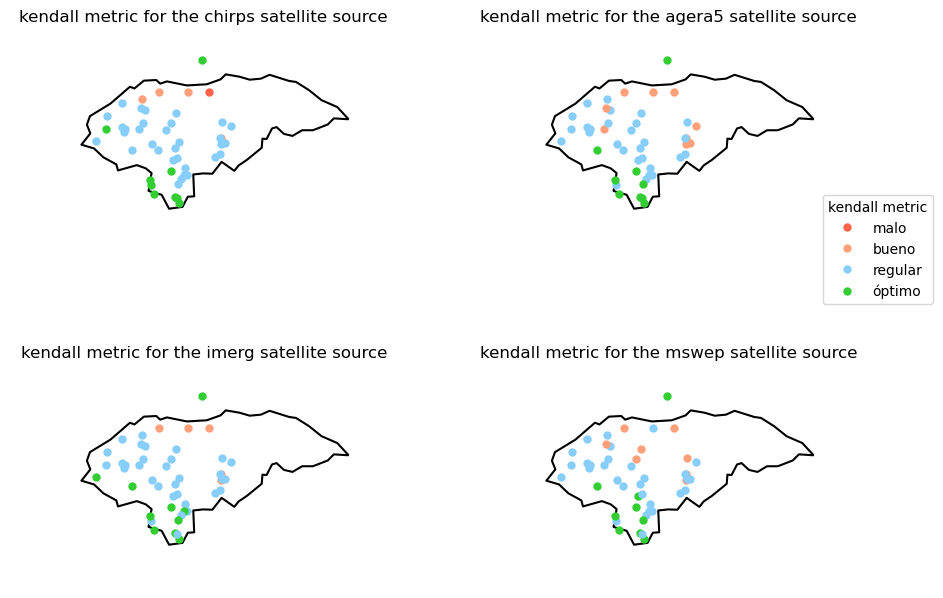

In [23]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(2, 2, figsize=(11, 8))

map_metric_dicrete(0, 0,dataset, 'chirps',metric,rank)
map_metric_dicrete(0, 1,dataset, 'agera5',metric, rank)
map_metric_dicrete(1, 0,dataset, 'imerg',metric, rank)
map_metric_dicrete(1, 1,dataset, 'mswep',metric, rank)

In [24]:
dataset=info_r15
metric='kendall'
rank=[0,  0.25, 0.5, 0.75,1]

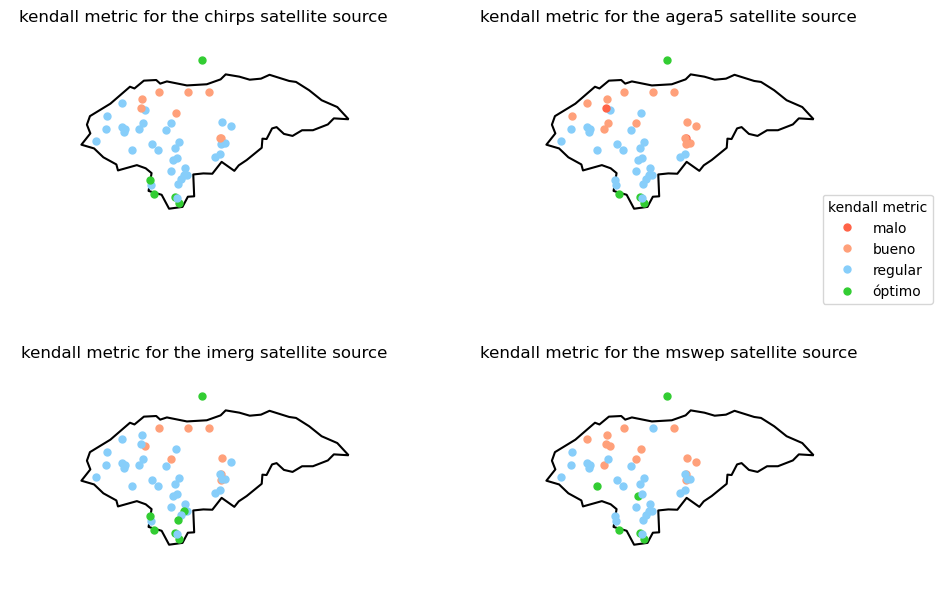

In [25]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(2, 2, figsize=(11, 8))

map_metric_dicrete(0, 0,dataset, 'chirps',metric,rank)
map_metric_dicrete(0, 1,dataset, 'agera5',metric, rank)
map_metric_dicrete(1, 0,dataset, 'imerg',metric, rank)
map_metric_dicrete(1, 1,dataset, 'mswep',metric, rank)

# maape

In [26]:
dataset=info
metric='maape'
rank=[0,  0.25, 0.5, 0.75, 1.3]

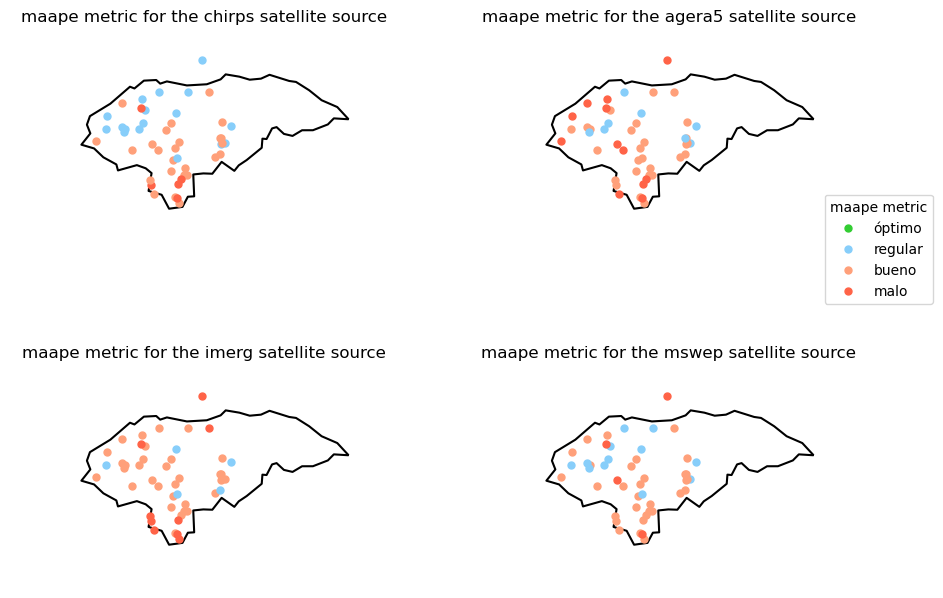

In [27]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(2, 2, figsize=(11, 8))

map_metric_dicrete(0, 0,dataset, 'chirps',metric,rank)
map_metric_dicrete(0, 1,dataset, 'agera5',metric, rank)
map_metric_dicrete(1, 0,dataset, 'imerg',metric, rank)
map_metric_dicrete(1, 1,dataset, 'mswep',metric, rank)

In [28]:
dataset=info_r10
metric='maape'
rank=[0,  0.25, 0.5, 0.75, 1.3]

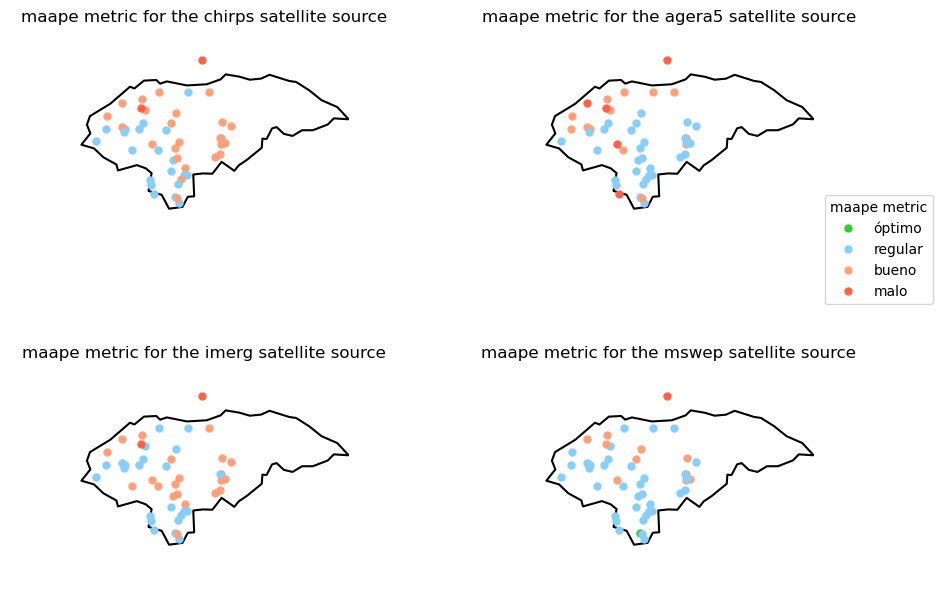

In [29]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(2, 2, figsize=(11, 8))

map_metric_dicrete(0, 0,dataset, 'chirps',metric,rank)
map_metric_dicrete(0, 1,dataset, 'agera5',metric, rank)
map_metric_dicrete(1, 0,dataset, 'imerg',metric, rank)
map_metric_dicrete(1, 1,dataset, 'mswep',metric, rank)

In [30]:
dataset=info_r15
metric='maape'
rank=[0,  0.25, 0.5, 0.75, 1.3]

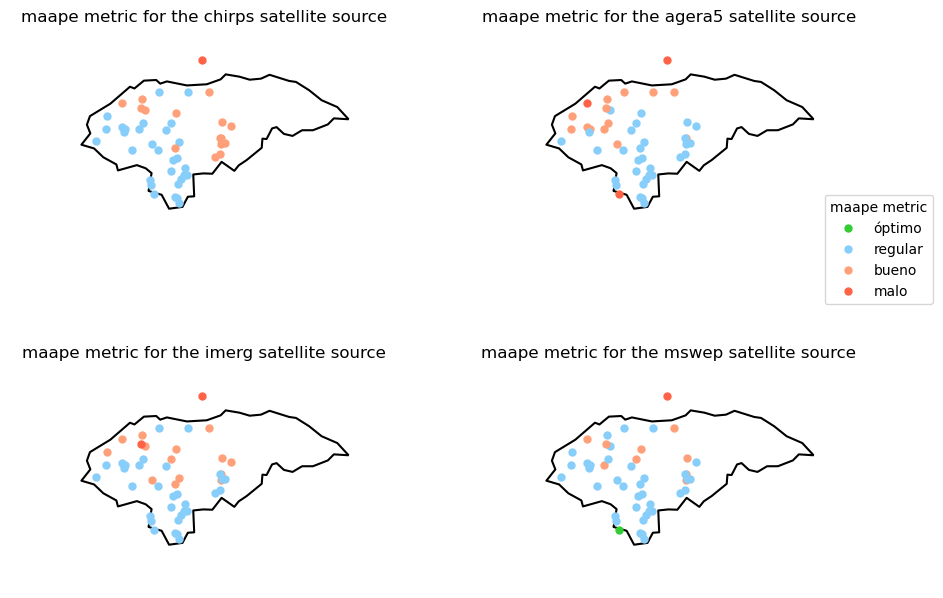

In [31]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(2, 2, figsize=(11, 8))

map_metric_dicrete(0, 0,dataset, 'chirps',metric,rank)
map_metric_dicrete(0, 1,dataset, 'agera5',metric, rank)
map_metric_dicrete(1, 0,dataset, 'imerg',metric, rank)
map_metric_dicrete(1, 1,dataset, 'mswep',metric, rank)

# per month

In [32]:
monthly_data = pd.read_csv(folder+monthly_file).rename(
        columns={'Unnamed: 0':'estacion'})
monthly_data.head(2)

estacion        r2       r2_        rmse   kendall  spearman        mape  \
0    ESQUIAS -1.367041  0.000427  177.860418  0.111111  0.248485   71.628811   
1  LA ERMITA -1.146422  0.040322  189.365515  0.117647  0.186275  108.179732   

      maape  month source  
0  0.601725      1  imerg  
1  0.625398      1  imerg

In [33]:
info_monthly = monthly_data.merge(geo, how='inner', on='estacion')


In [34]:
def map_metric_month_discrete(i, j,df, month,source, metric,  interval=[0, 0.2, 0.4, 0.6, 1, 1.2]):
    axs[i, j].set_aspect('equal')
    axs[i, j].set_title(f'{metric} metric for month {month} for the {source} source')
    axs[i, j].set_xlim([-91, -82])
    axs[i, j].set_ylim([12, 17])
    # Ocultar los ejes x e y
    axs[i, j].set_axis_off()
    hn.plot(ax=axs[i, j], edgecolor='black', facecolor='white', linewidth=1.5)
    df_ = df[(df['source']==source) & (df['month']==month)].reset_index(drop=True)


    # Definir los intervalos y los colores para cada intervalo
    if metric=='maape':
        intervals = interval
        colors_list = ['limegreen','lightskyblue', 'gold','tomato']
        cmap = colors.ListedColormap(colors_list)
        norm = colors.BoundaryNorm(intervals, cmap.N)
    if metric!='maape':
        intervals = interval
        colors_list =  ['tomato','gold','lightskyblue', 'limegreen']
        cmap = colors.ListedColormap(colors_list)
        norm = colors.BoundaryNorm(intervals, cmap.N)

        
    
    for index, row in df_.iterrows():
        color_index = norm(row[metric])
        axs[i, j].plot(row['Lon'], row['Lat'], marker='o', markersize=5,
                    color=cmap(color_index))
    
     # Crear la leyenda
    handles = []
    labels = []
    for i, interval in enumerate(intervals[:-1]):
        color = cmap(norm(interval))
        label = f"{interval:.1f} - {intervals[i+1]:.1f}"
        handles.append(plt.Line2D([], [], color=color, marker='o', markersize=5, linestyle='None'))
        labels.append(label)
    plt.legend(handles=handles, labels=labels, title=f'{metric} metric',bbox_to_anchor=(1.2, 1.8))

    if metric != 'maape':
        plt.legend(handles=handles, labels=['malo', 'bueno', 'regular', 'óptimo'], title=f'{metric} metric',bbox_to_anchor=(1.2, 1.8))
    else:
        plt.legend(handles=handles, labels=['óptimo', 'regular', 'bueno', 'malo'], title=f'{metric} metric',bbox_to_anchor=(1.2, 1.8))


In [35]:
def map_metric_month(i, j,df, month,source, metric, colors=plt.cm.viridis):
    axs[i, j].set_aspect('equal')
    axs[i, j].set_title(f'{metric} metric for month {month} for the {source} source')
    axs[i, j].set_xlim([-91, -82])
    axs[i, j].set_ylim([12, 17])
    hn.plot(ax=axs[i, j], edgecolor='black', facecolor='white', linewidth=1.5)
    df_ = df[(df['source']==source) & (df['month']==month)].reset_index(drop=True)

    min_metric = df[metric].min()
    max_metric = df[metric].max()
    for index, row in df_.iterrows():
        axs[i, j].plot(row['Lon'], row['Lat'], marker='o', markersize=5,
                    color=colors(row[metric]))
    sm_hn = plt.cm.ScalarMappable(cmap=colors,
                               norm=plt.Normalize(vmin=min_metric, vmax=max_metric))
    sm_hn._A = []
    cbar_hn = plt.colorbar(sm_hn, ax=axs[i, j], orientation='horizontal', fraction=0.05, pad=0.08)
    return cbar_hn.ax.set_xlabel(metric)

# MAAPE

In [36]:
metrica='maape'
ranks= [0,  0.25, 0.5, 0.75,1.3]

maape
meses secos (chirps)


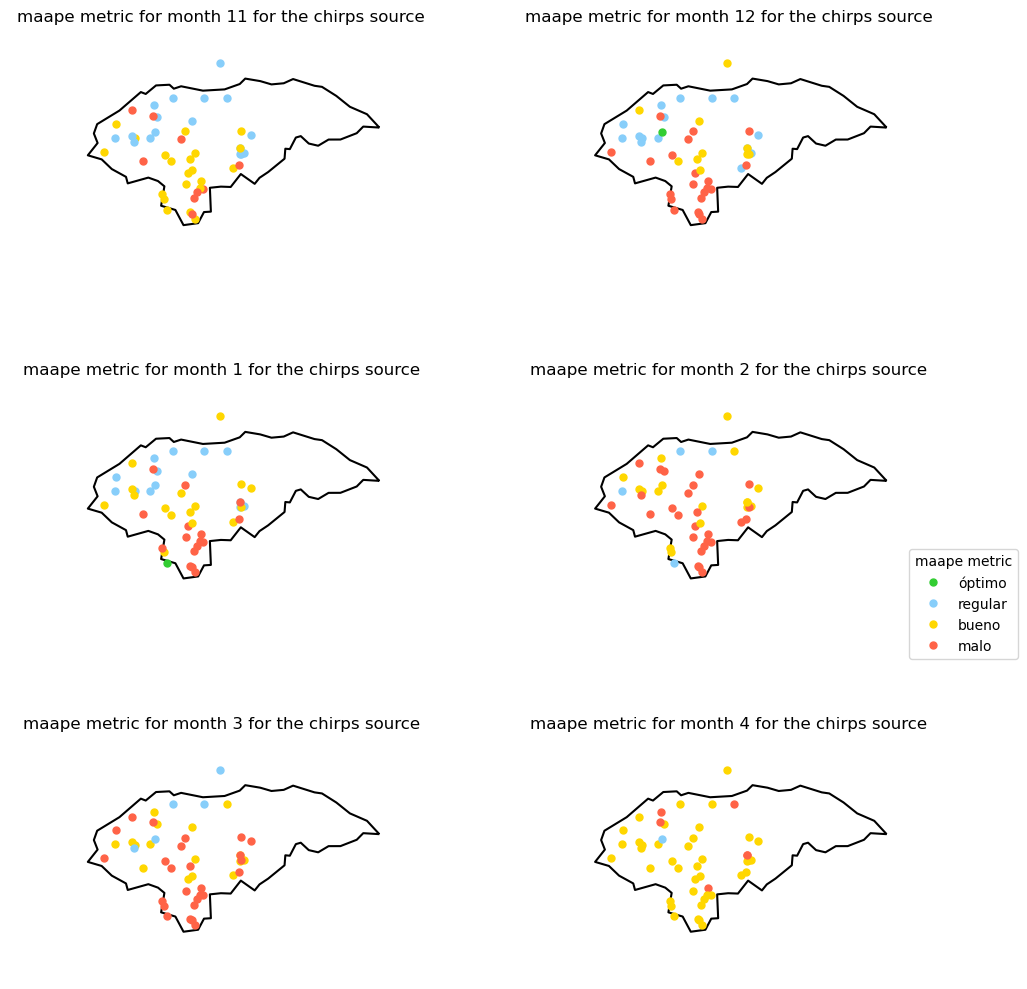

meses lluviosos (chirps)


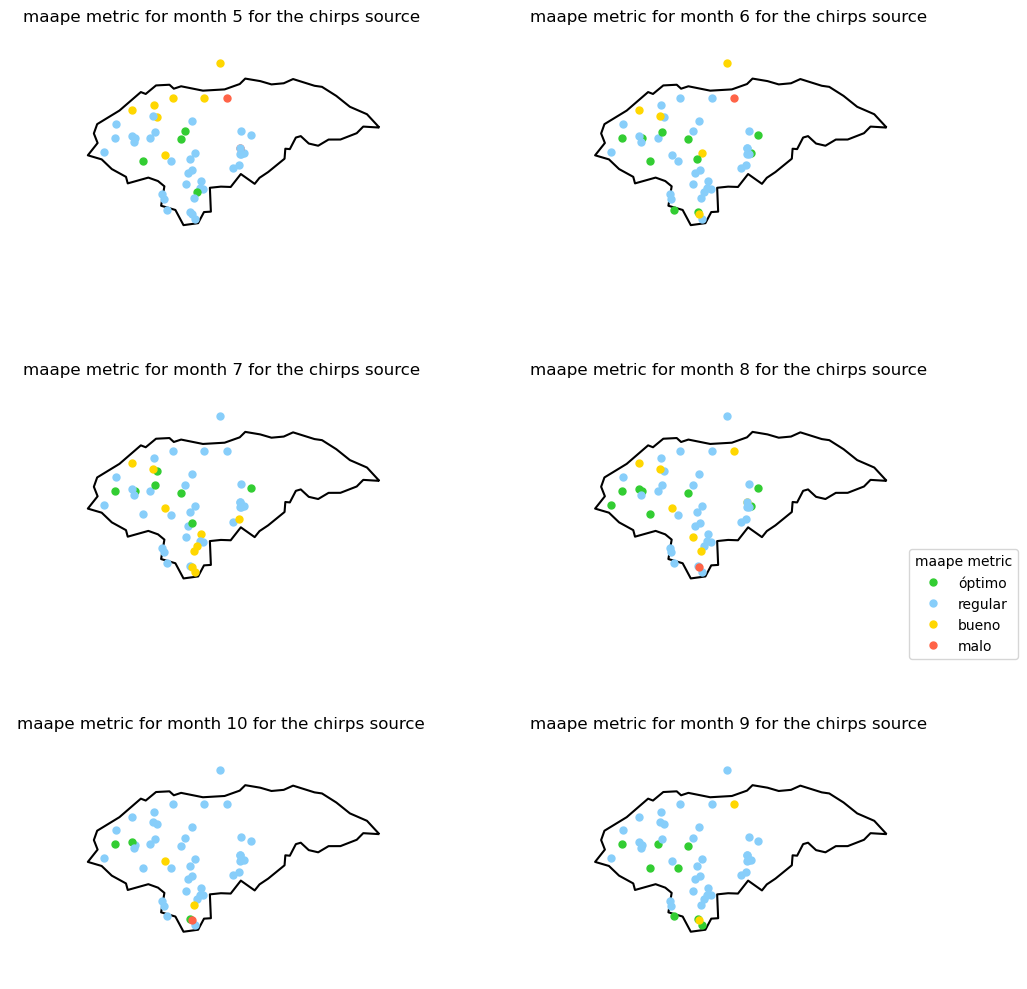

meses secos (agera5)


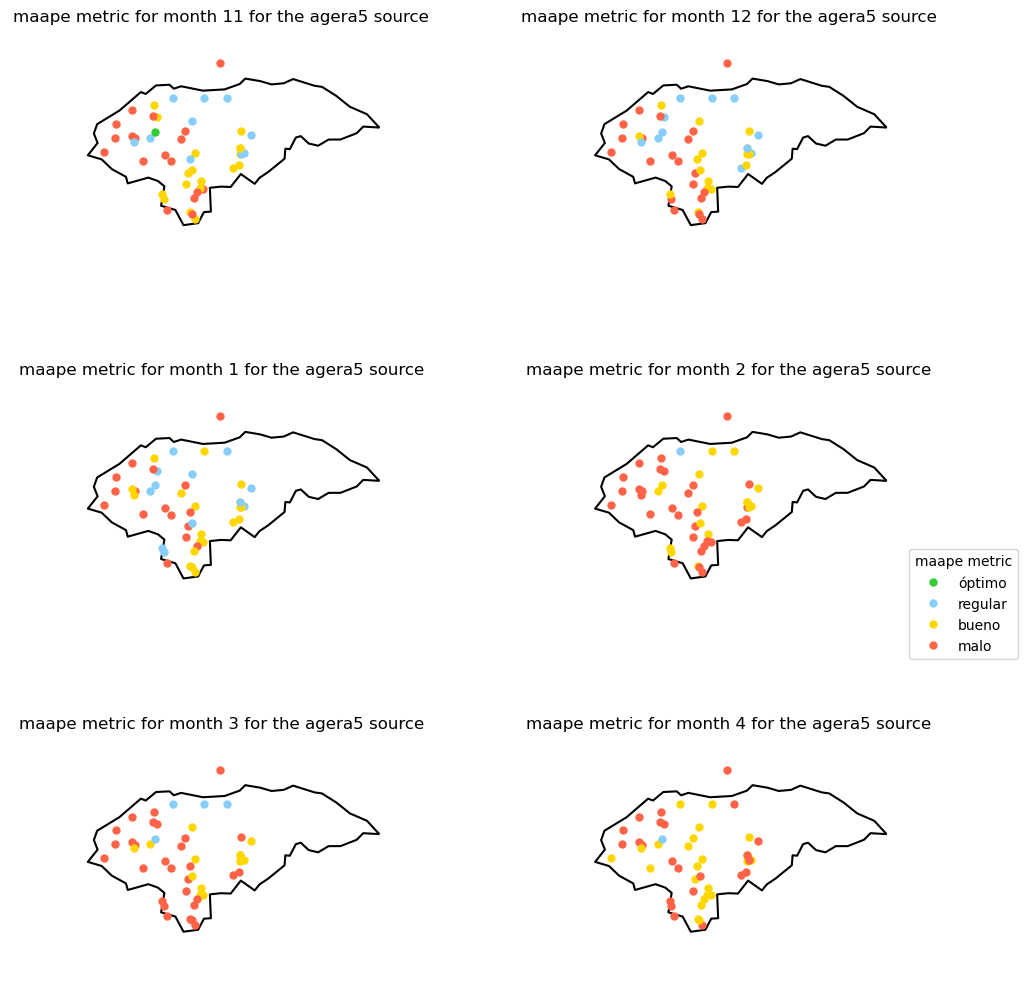

meses lluviosos (agera5)


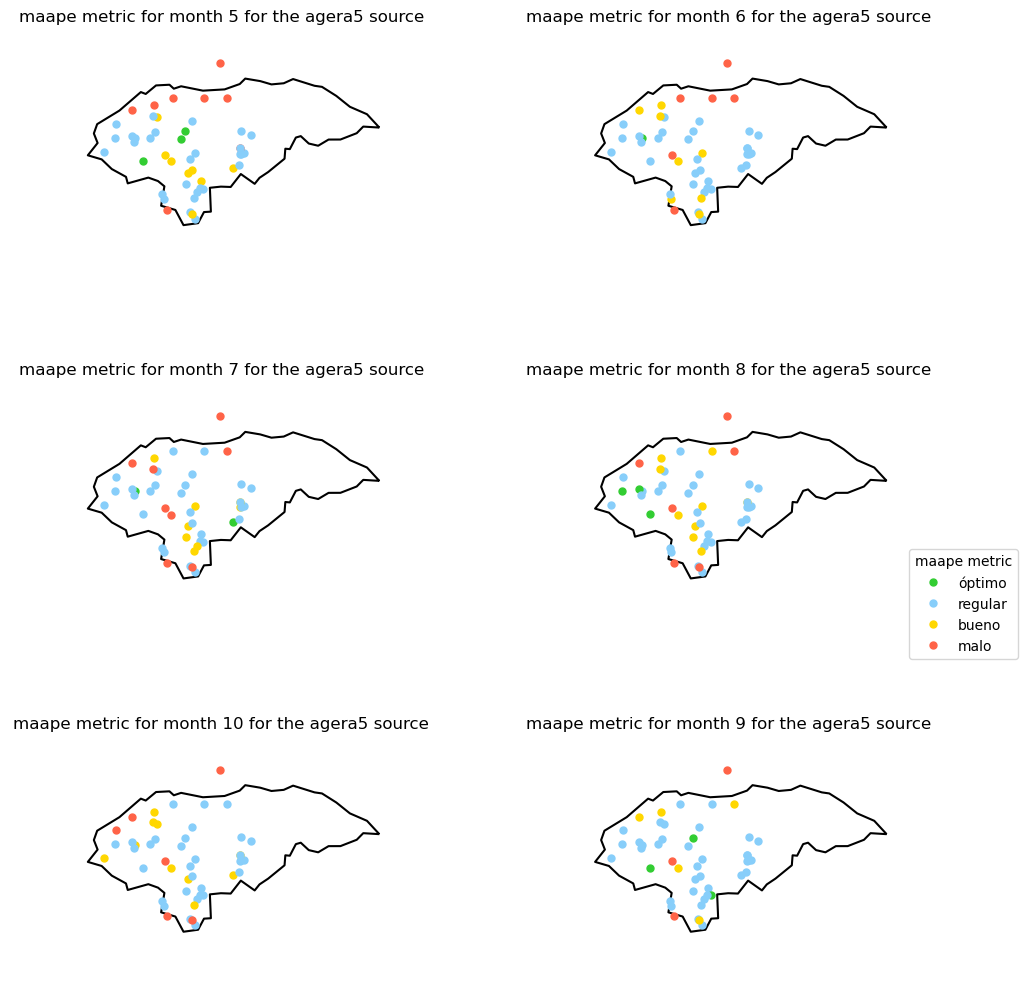

meses secos (imerg)


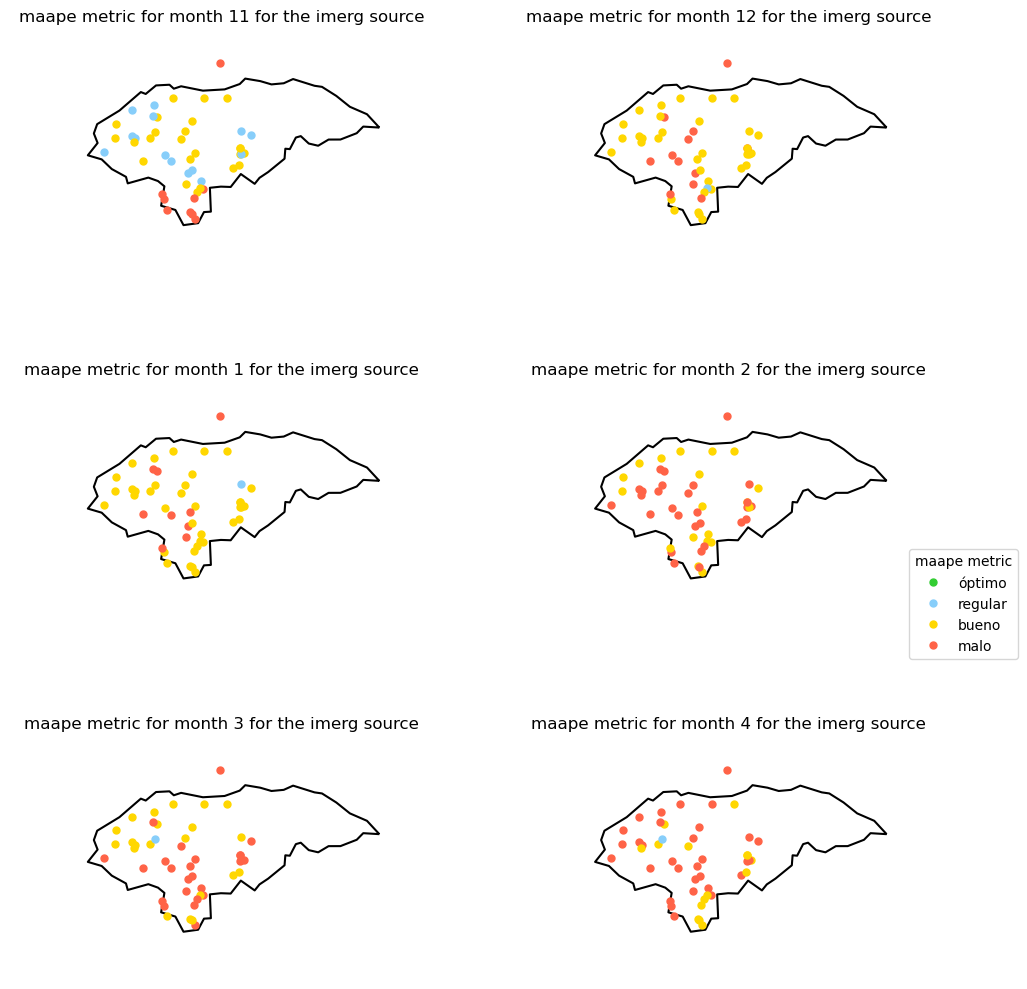

meses lluvia (imerg)


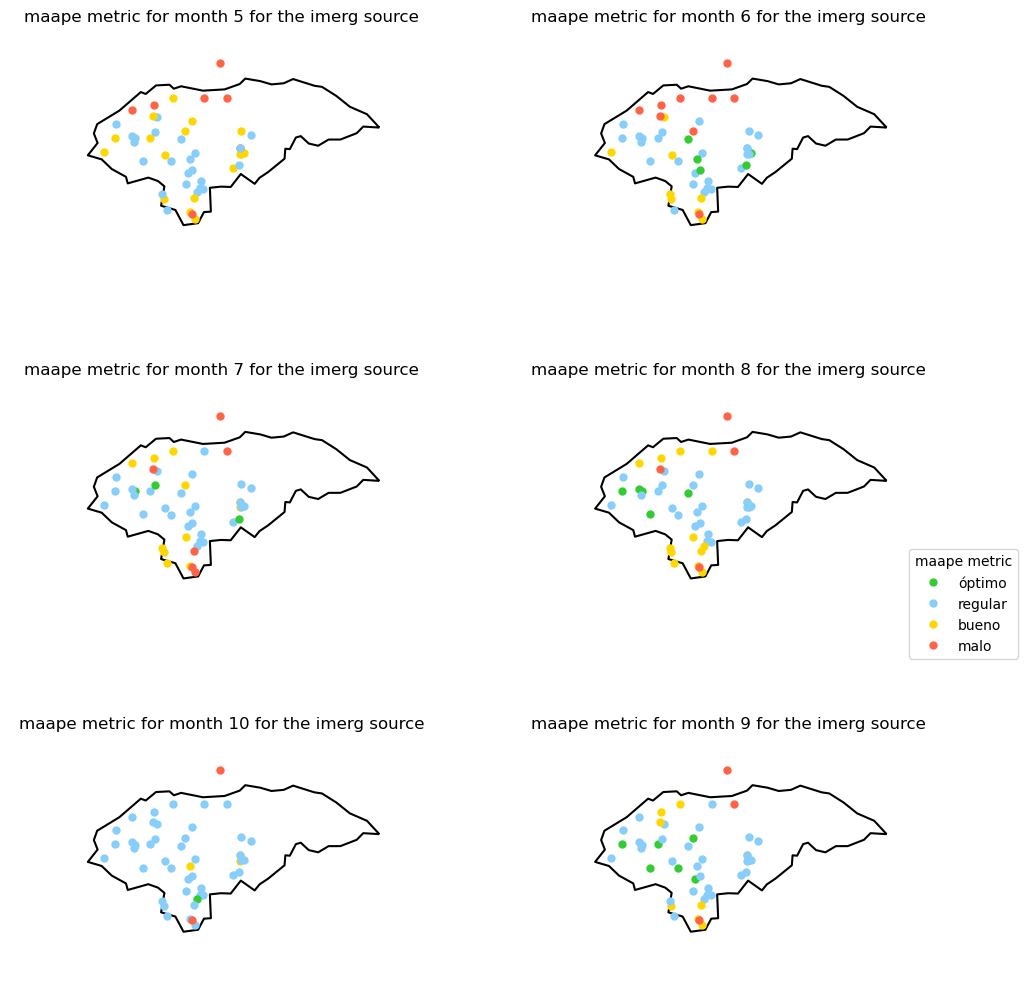

meses  secos (mswep)


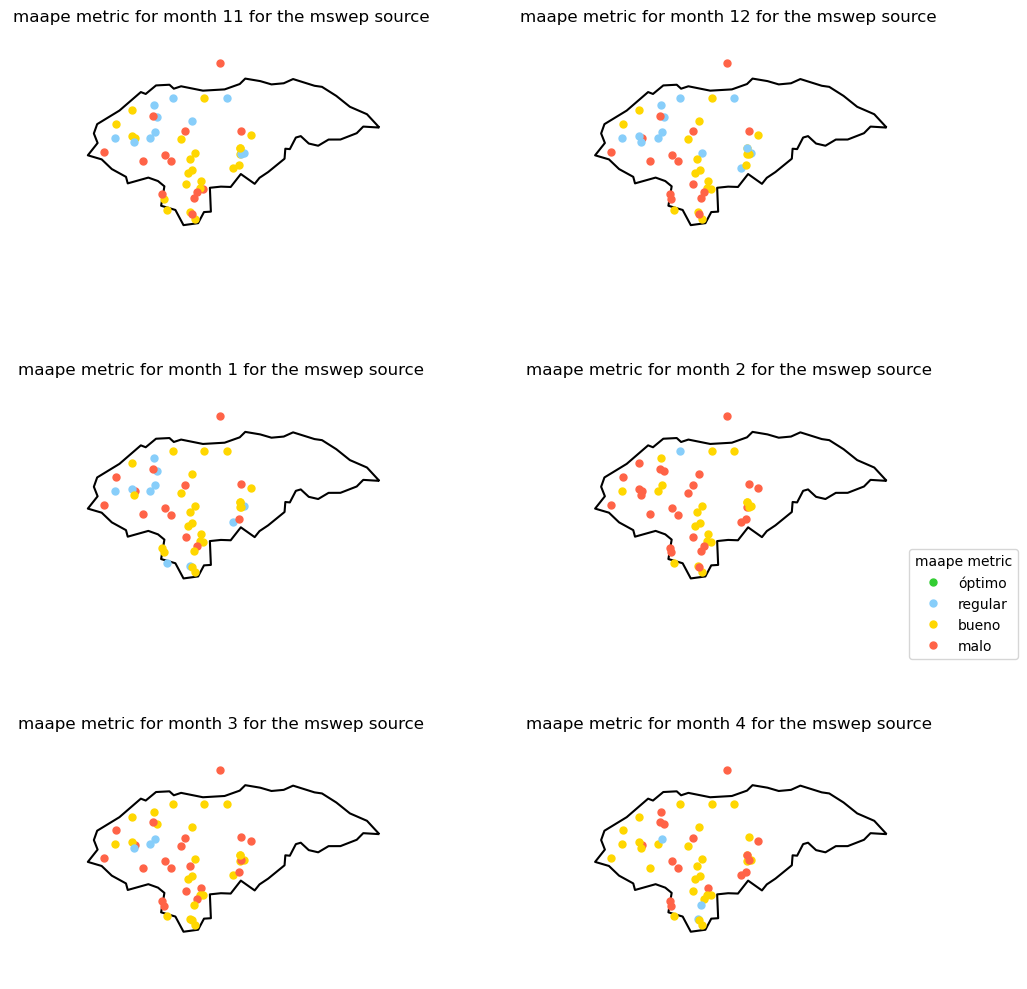

meses  lluvia (mswep)


<function matplotlib.pyplot.show(close=None, block=None)>

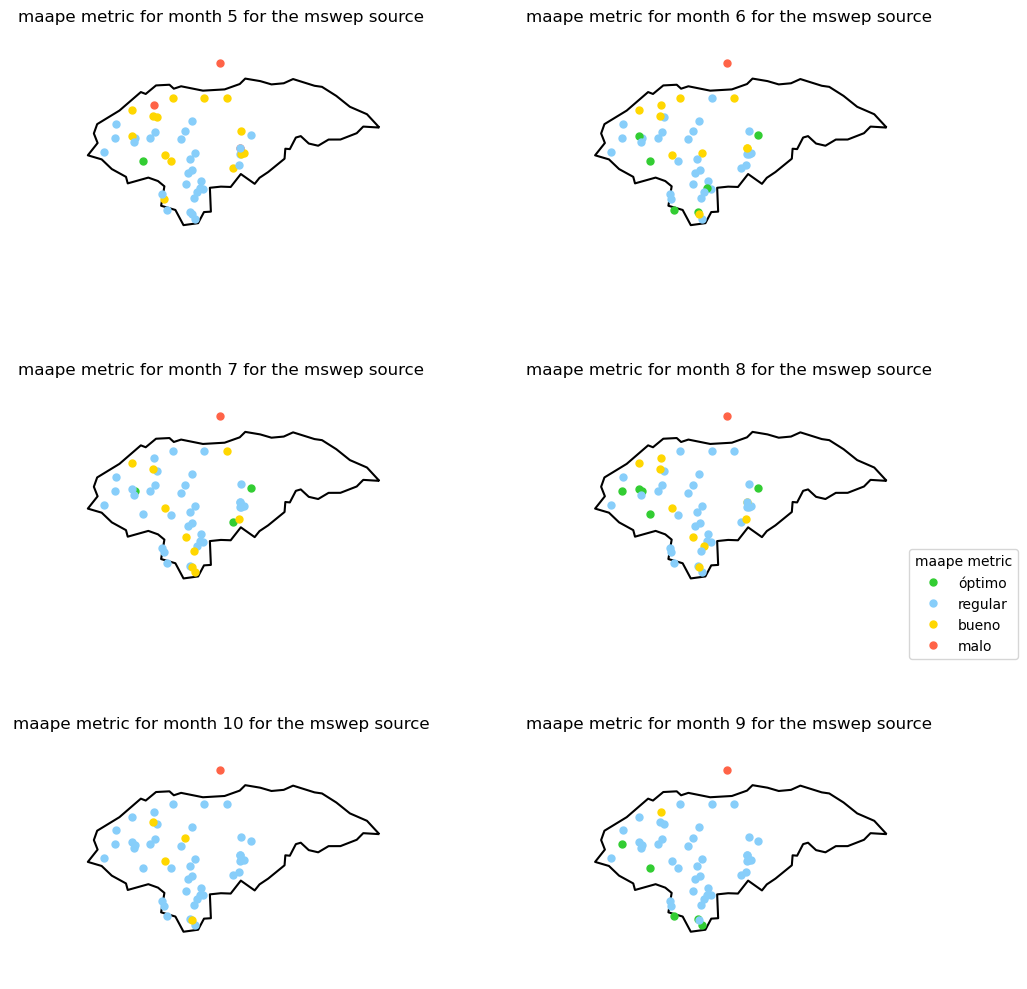

In [37]:
print(f"\033[1m{metrica}\033[0m")
print('meses secos (chirps)')
print("======================================================================================================================")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 11,'chirps', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 1,'chirps',  metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 12,'chirps',  metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 2,'chirps',  metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 3,'chirps',  metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 4,'chirps',  metrica,ranks)
plt.show()
print("======================================================================================================================")
print("======================================================================================================================")
print('meses lluviosos (chirps)')


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
hn = world.loc[world['iso_a3'] == 'HND']
fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 5,'chirps', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 7,'chirps', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 6,'chirps', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 8,'chirps', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 10,'chirps', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 9,'chirps', metrica,ranks)
plt.show()
print("======================================================================================================================")
print("======================================================================================================================")
print('meses secos (agera5)')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 11,'agera5', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 1,'agera5', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 12,'agera5', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 2,'agera5', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 3,'agera5', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 4,'agera5', metrica,ranks)
plt.show()

print("======================================================================================================================")
print("======================================================================================================================")
print('meses lluviosos (agera5)')


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
hn = world.loc[world['iso_a3'] == 'HND']
fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 5,'agera5', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 7,'agera5', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 6,'agera5', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 8,'agera5', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 10,'agera5', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 9,'agera5', metrica,ranks)
plt.show()
print("======================================================================================================================")
print("======================================================================================================================")
print('meses secos (imerg)')
# meses secos (imerg)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 11,'imerg', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 1,'imerg', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 12,'imerg', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 2,'imerg', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 3,'imerg', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 4,'imerg', metrica,ranks)
plt.show()

print("======================================================================================================================")
print("======================================================================================================================")
print('meses lluvia (imerg)')
# meses con lluvia

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

# crear una figura con cuatro subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 5,'imerg', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 7,'imerg', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 6,'imerg', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 8,'imerg', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 10,'imerg', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 9,'imerg', metrica,ranks)
plt.show()
print("======================================================================================================================")
print("======================================================================================================================")
print('meses  secos (mswep)')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 11,'mswep', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 1,'mswep', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 12,'mswep', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 2,'mswep', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 3,'mswep', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 4,'mswep', metrica,ranks)
plt.show()
print("======================================================================================================================")
print("======================================================================================================================")
print('meses  lluvia (mswep)')
# meses con lluvia


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

# crear una figura con cuatro subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 5,'mswep', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 7,'mswep', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 6,'mswep', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 8,'mswep', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 10,'mswep', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 9,'mswep', metrica,ranks)
plt.show

# kendall

In [38]:
metrica='kendall'
ranks= [0,  0.25, 0.5, 0.75, 1]

kendall
meses secos (chirps)


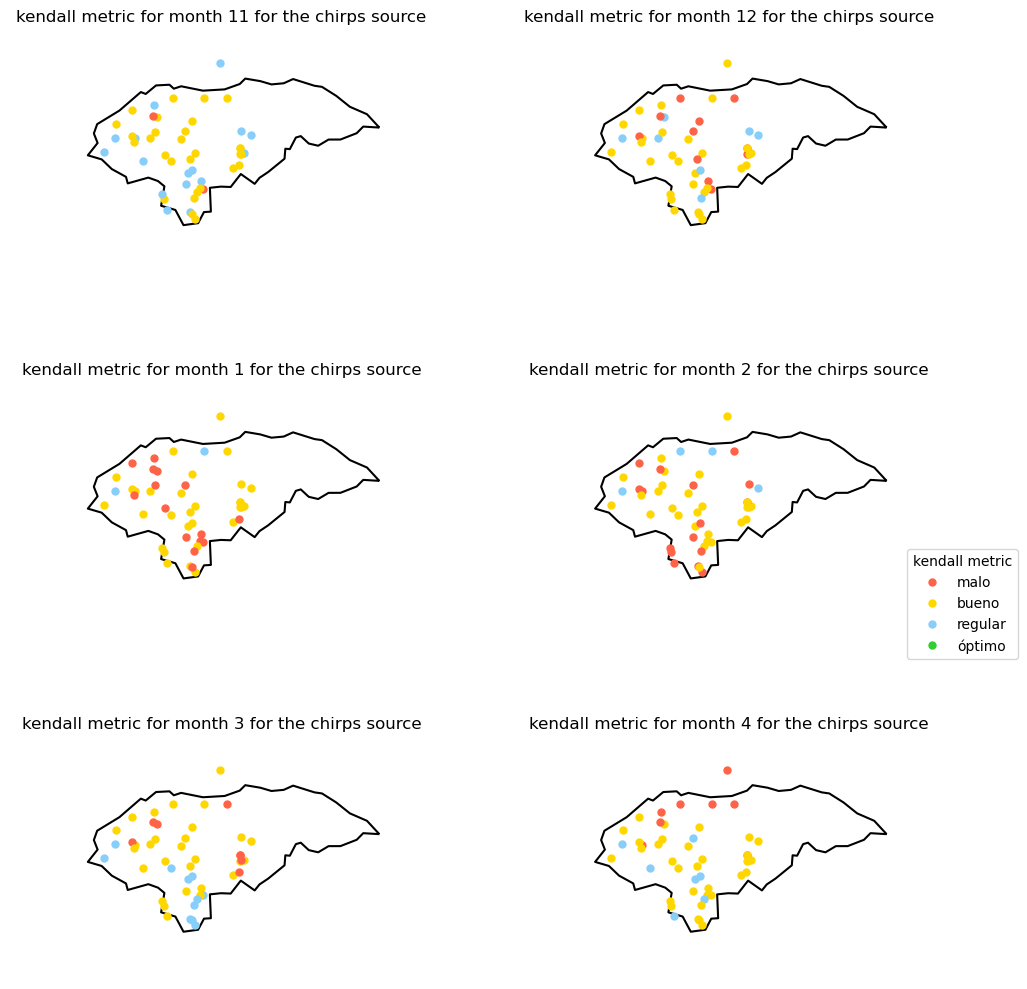

meses lluviosos (chirps)


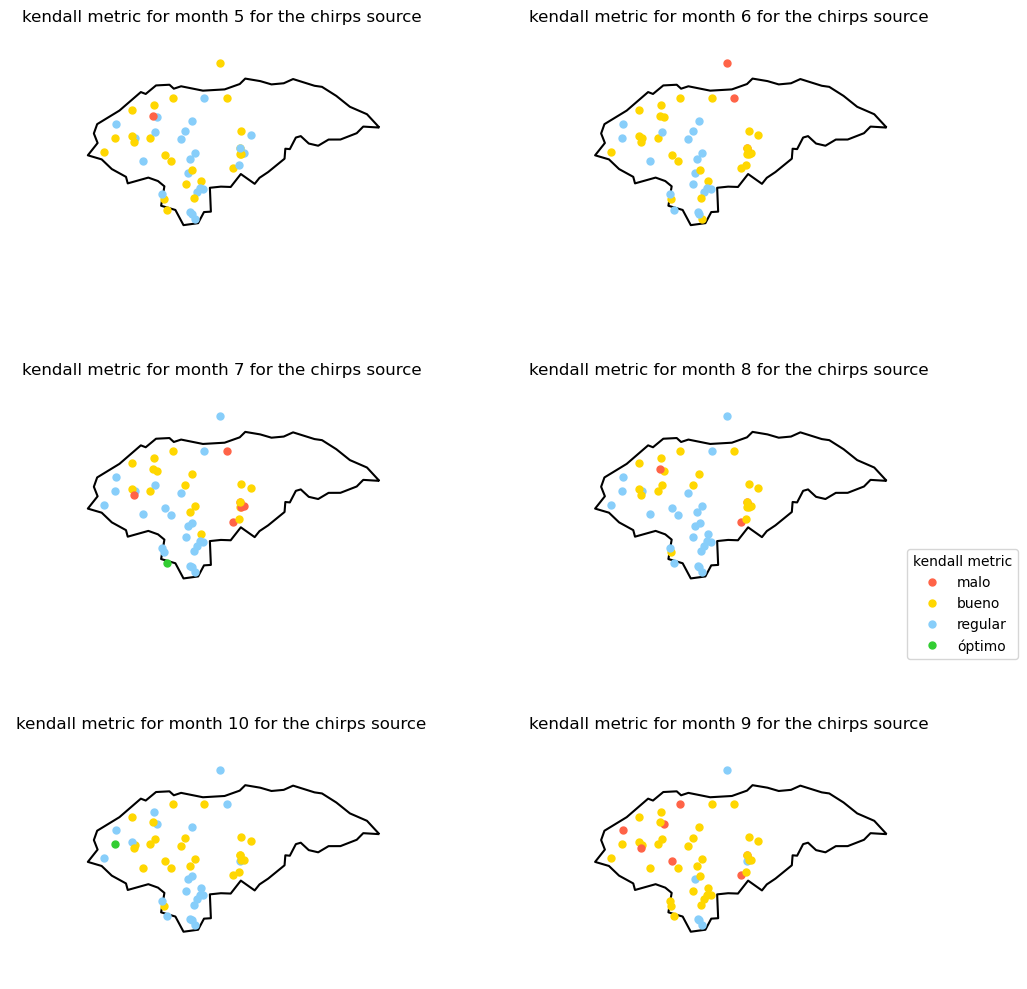

meses secos (agera5)


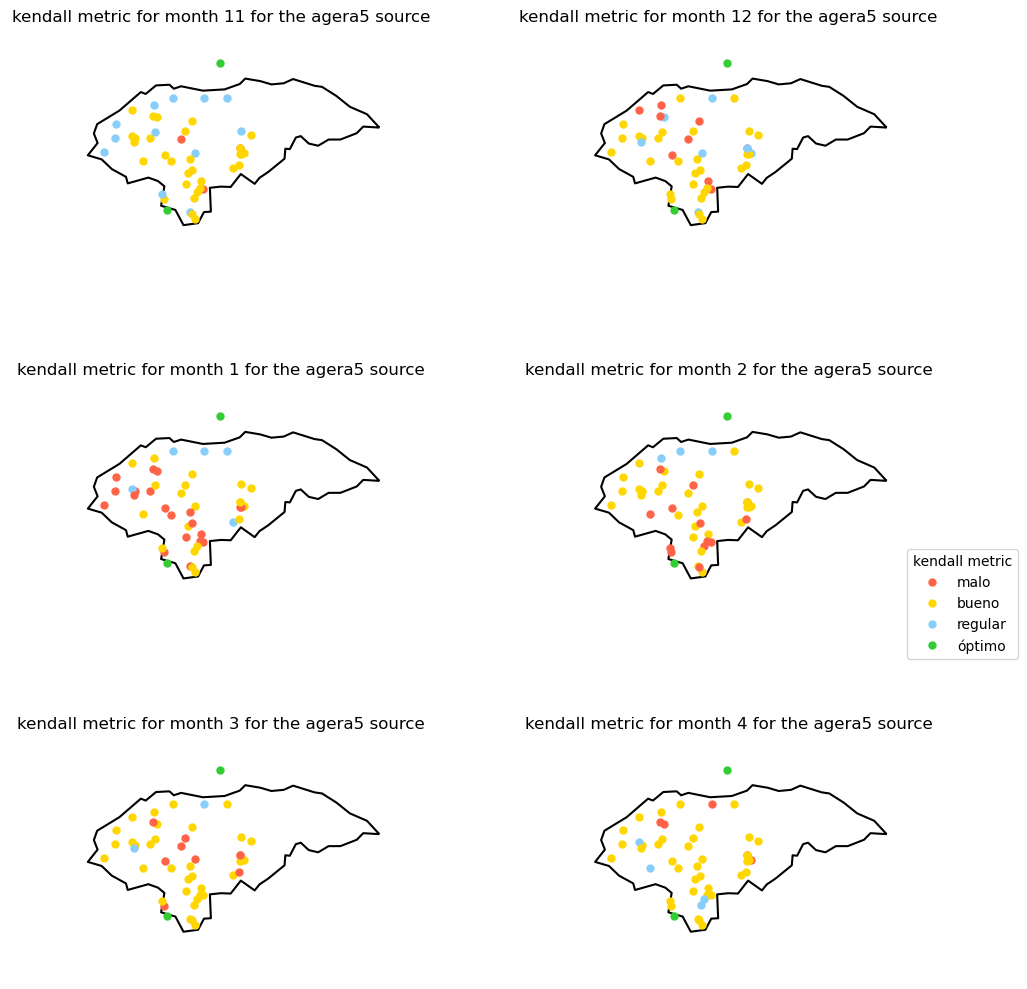

meses lluviosos (agera5)


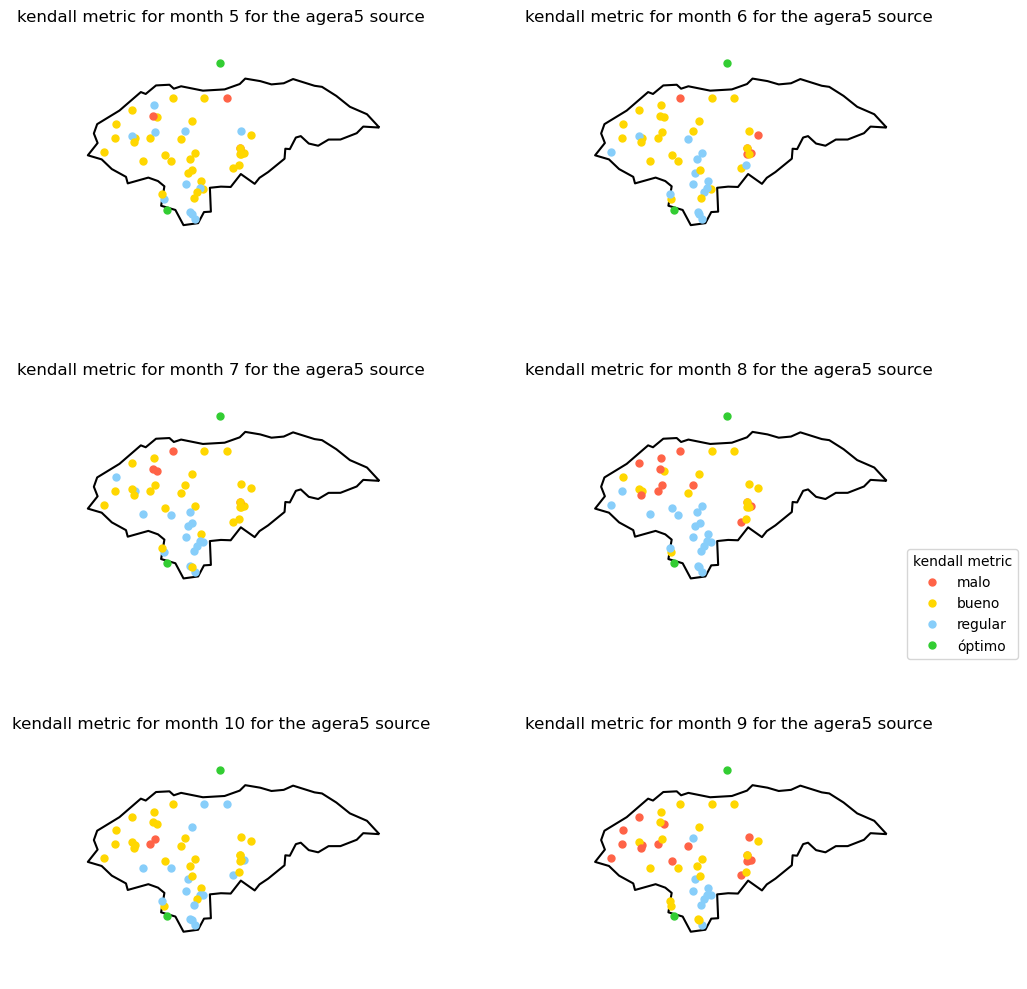

meses secos (imerg)


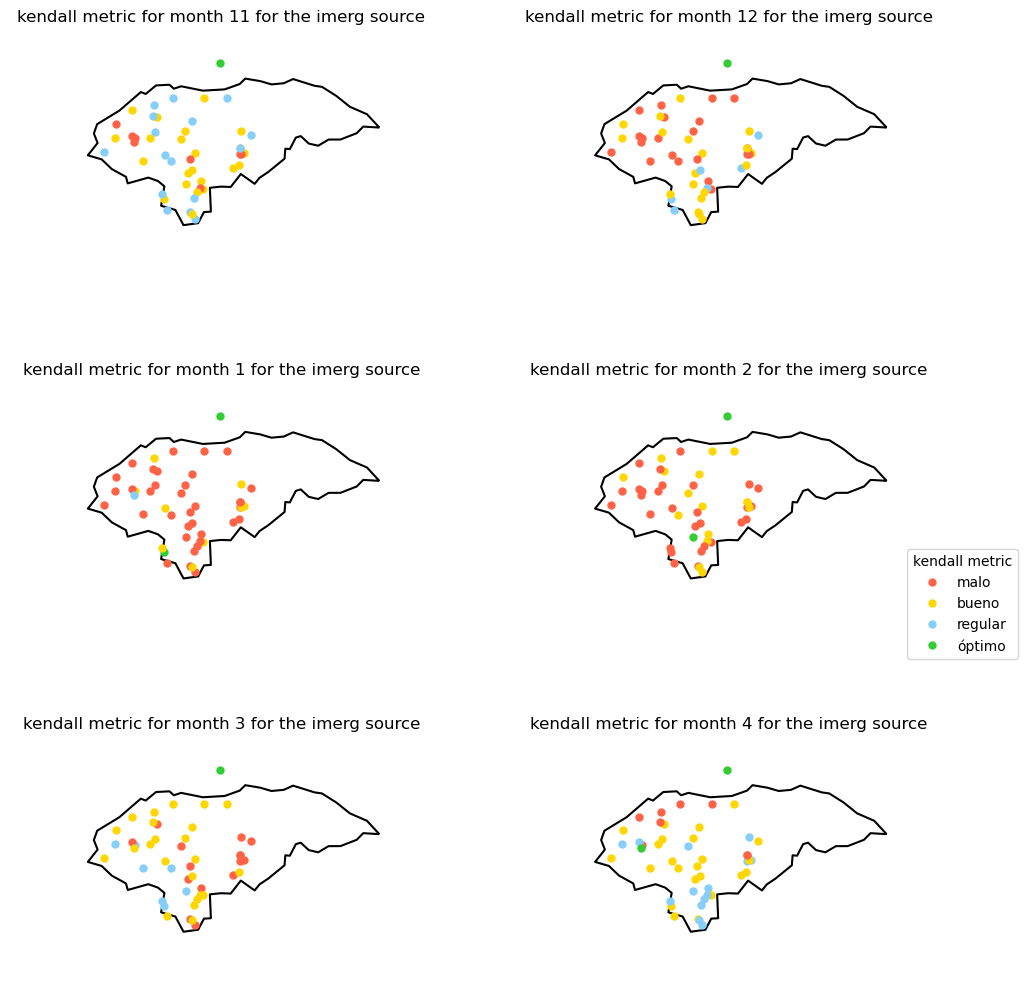

meses lluvia (imerg)


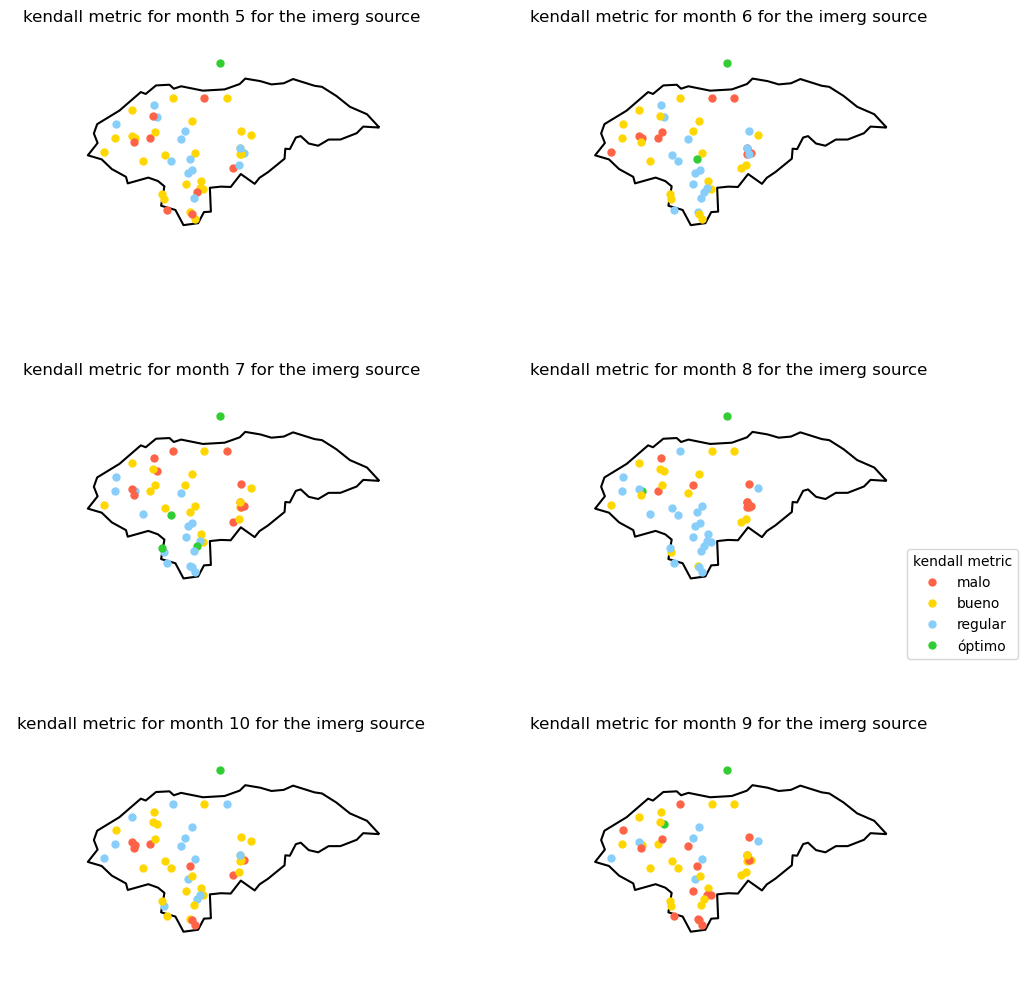

meses  secos (mswep)


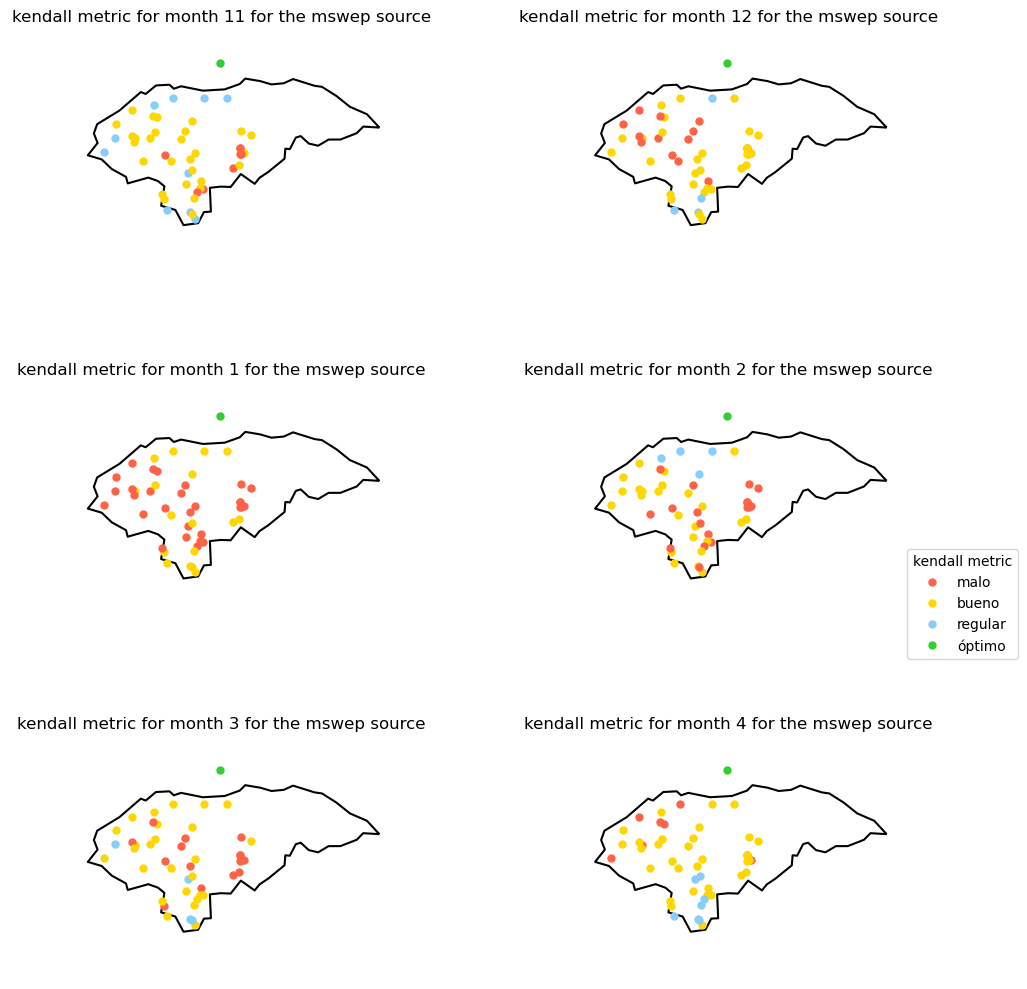

meses  lluvia (mswep)


<function matplotlib.pyplot.show(close=None, block=None)>

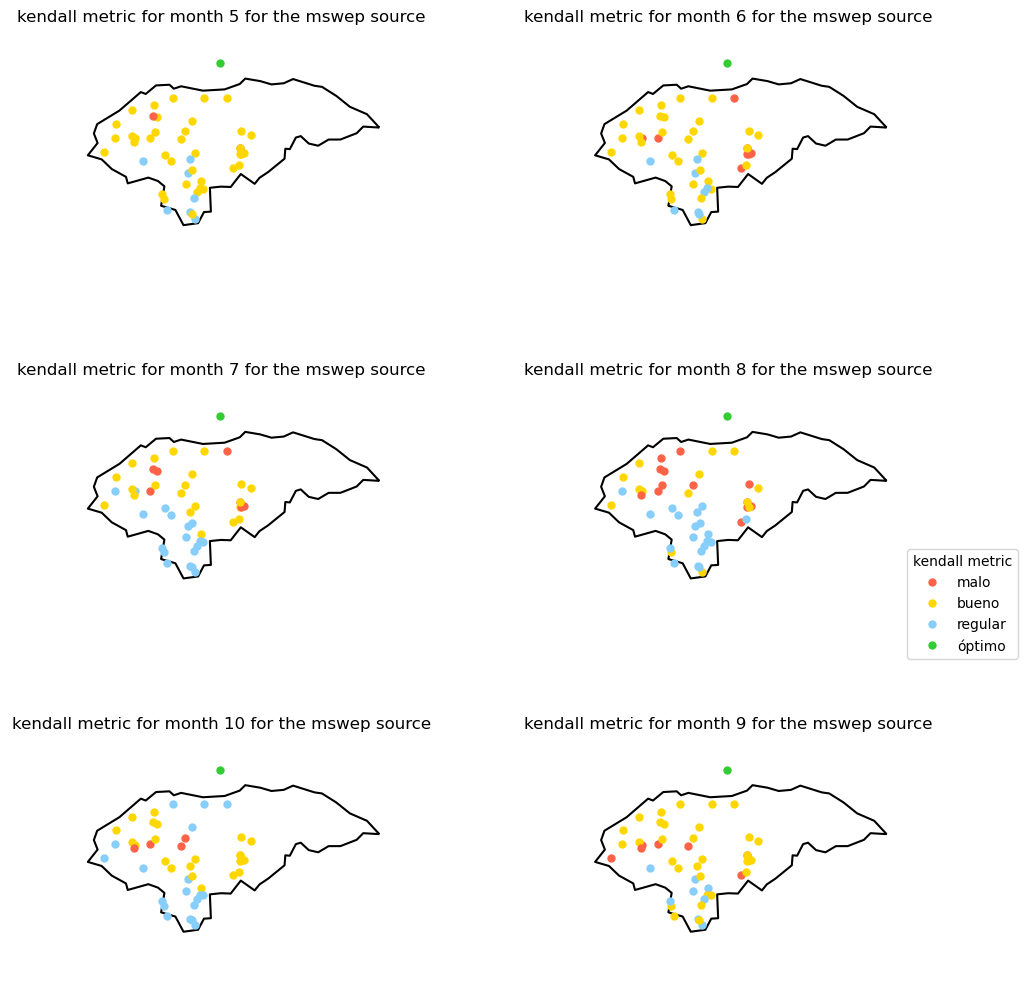

In [39]:
print(f"\033[1m{metrica}\033[0m")
print('meses secos (chirps)')
print("======================================================================================================================")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 11,'chirps', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 1,'chirps',  metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 12,'chirps',  metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 2,'chirps',  metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 3,'chirps',  metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 4,'chirps',  metrica,ranks)
plt.show()
print("======================================================================================================================")
print("======================================================================================================================")
print('meses lluviosos (chirps)')


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
hn = world.loc[world['iso_a3'] == 'HND']
fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 5,'chirps', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 7,'chirps', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 6,'chirps', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 8,'chirps', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 10,'chirps', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 9,'chirps', metrica,ranks)
plt.show()
print("======================================================================================================================")
print("======================================================================================================================")
print('meses secos (agera5)')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 11,'agera5', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 1,'agera5', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 12,'agera5', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 2,'agera5', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 3,'agera5', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 4,'agera5', metrica,ranks)
plt.show()

print("======================================================================================================================")
print("======================================================================================================================")
print('meses lluviosos (agera5)')


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
hn = world.loc[world['iso_a3'] == 'HND']
fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 5,'agera5', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 7,'agera5', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 6,'agera5', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 8,'agera5', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 10,'agera5', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 9,'agera5', metrica,ranks)
plt.show()
print("======================================================================================================================")
print("======================================================================================================================")
print('meses secos (imerg)')
# meses secos (imerg)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 11,'imerg', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 1,'imerg', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 12,'imerg', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 2,'imerg', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 3,'imerg', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 4,'imerg', metrica,ranks)
plt.show()

print("======================================================================================================================")
print("======================================================================================================================")
print('meses lluvia (imerg)')
# meses con lluvia

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

# crear una figura con cuatro subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 5,'imerg', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 7,'imerg', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 6,'imerg', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 8,'imerg', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 10,'imerg', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 9,'imerg', metrica,ranks)
plt.show()
print("======================================================================================================================")
print("======================================================================================================================")
print('meses  secos (mswep)')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 11,'mswep', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 1,'mswep', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 12,'mswep', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 2,'mswep', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 3,'mswep', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 4,'mswep', metrica,ranks)
plt.show()
print("======================================================================================================================")
print("======================================================================================================================")
print('meses  lluvia (mswep)')
# meses con lluvia


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

# crear una figura con cuatro subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 5,'mswep', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 7,'mswep', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 6,'mswep', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 8,'mswep', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 10,'mswep', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 9,'mswep', metrica,ranks)
plt.show

# r2

In [40]:

metrica='r2_'
ranks= [-np.inf,  0.2,  0.4, 0.6, 1]

r2_
meses secos (chirps)


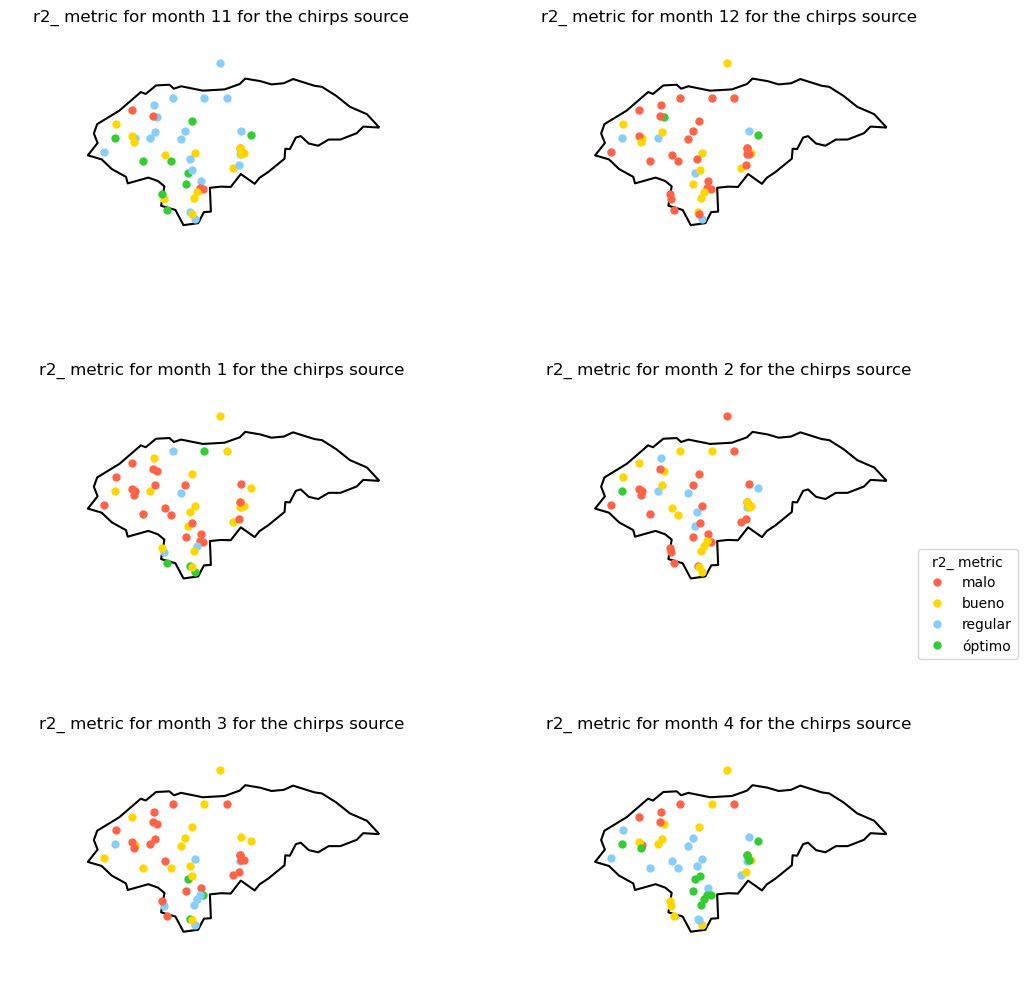

meses lluviosos (chirps)


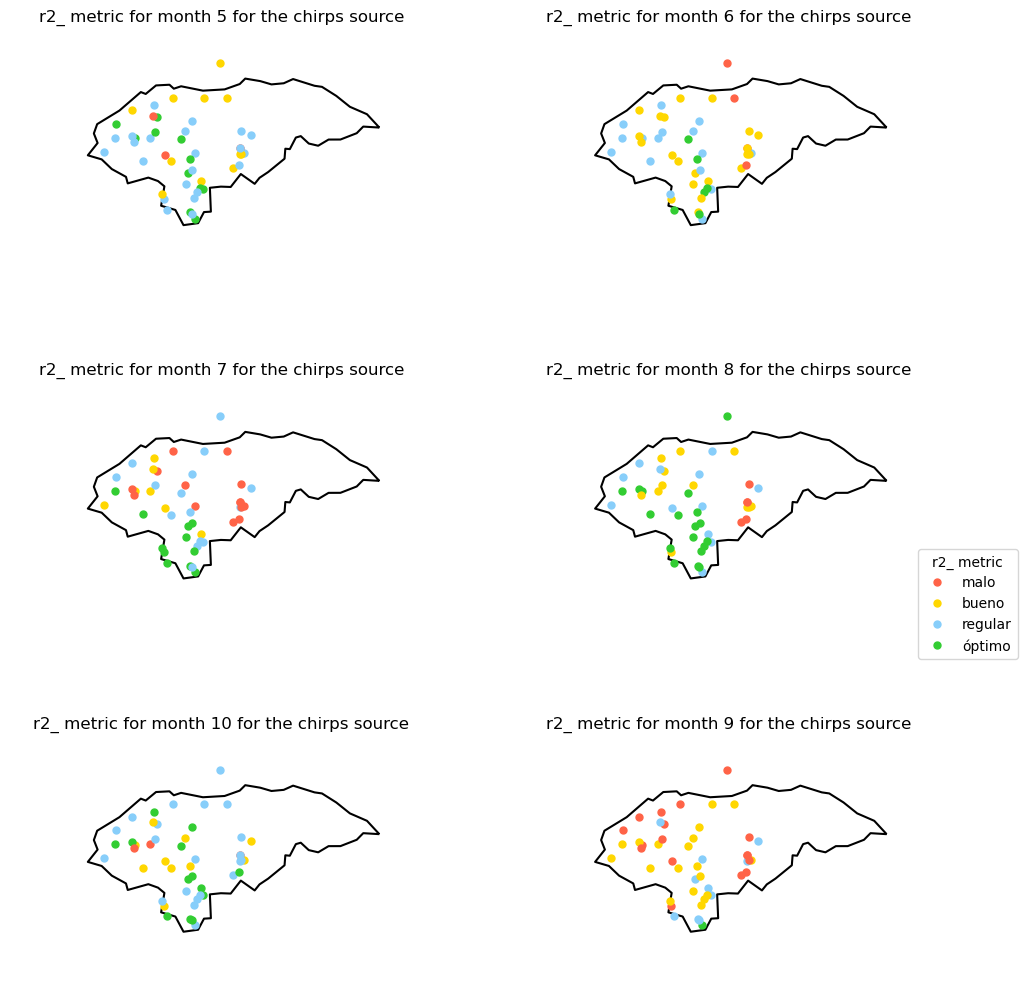

meses secos (agera5)


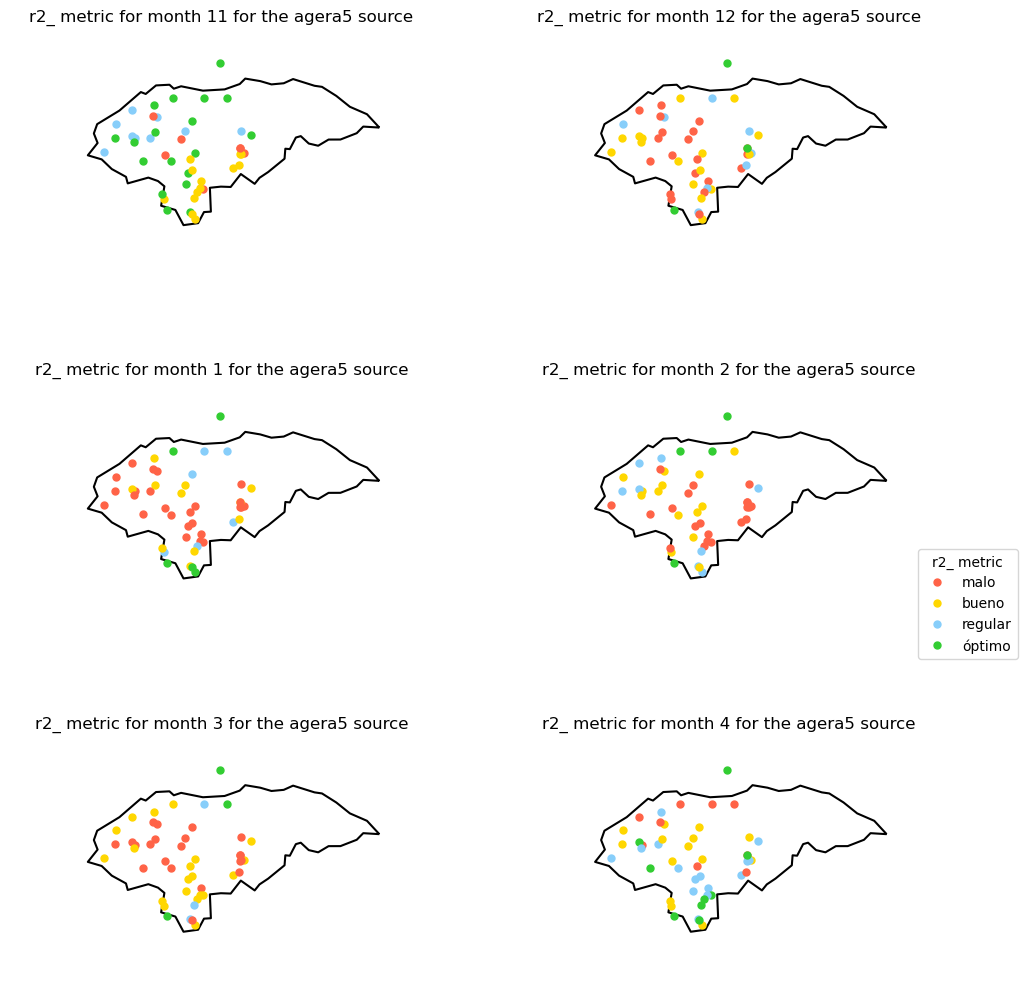

meses lluviosos (agera5)


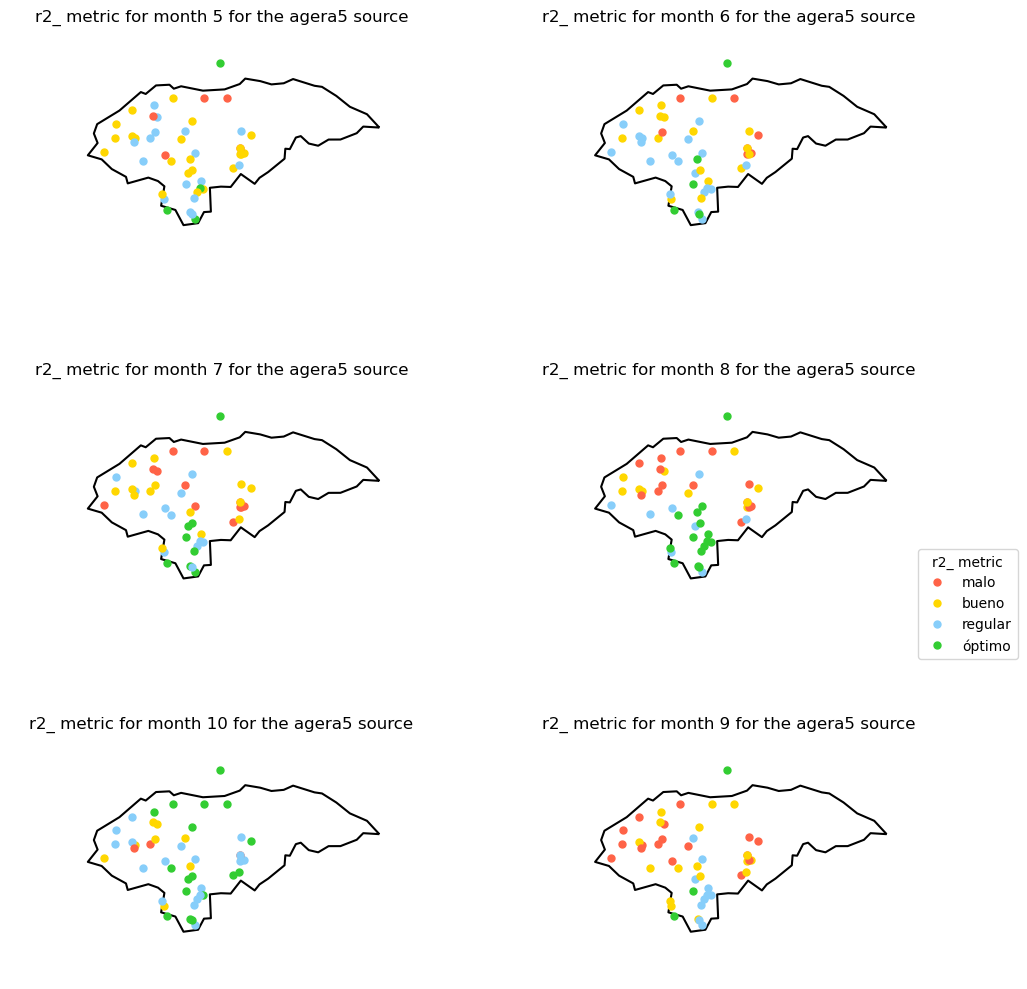

meses secos (imerg)


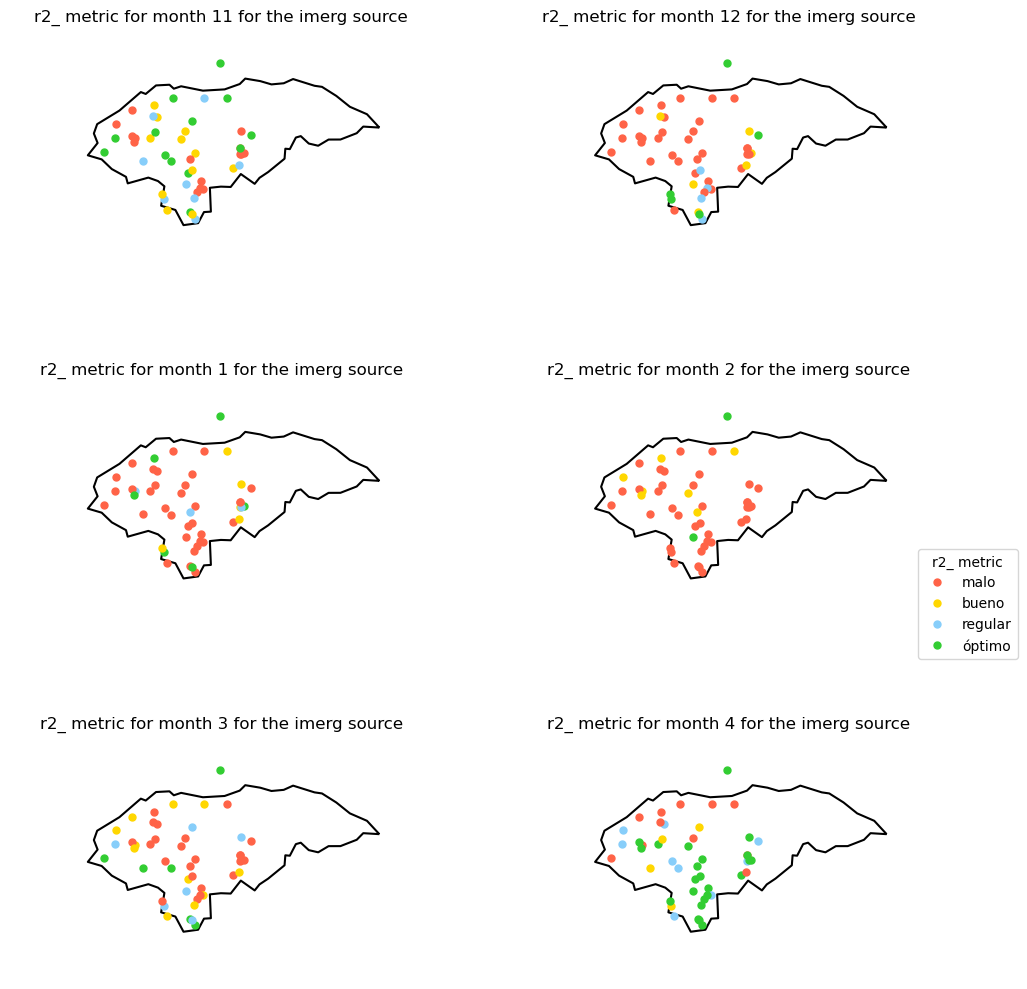

meses lluvia (imerg)


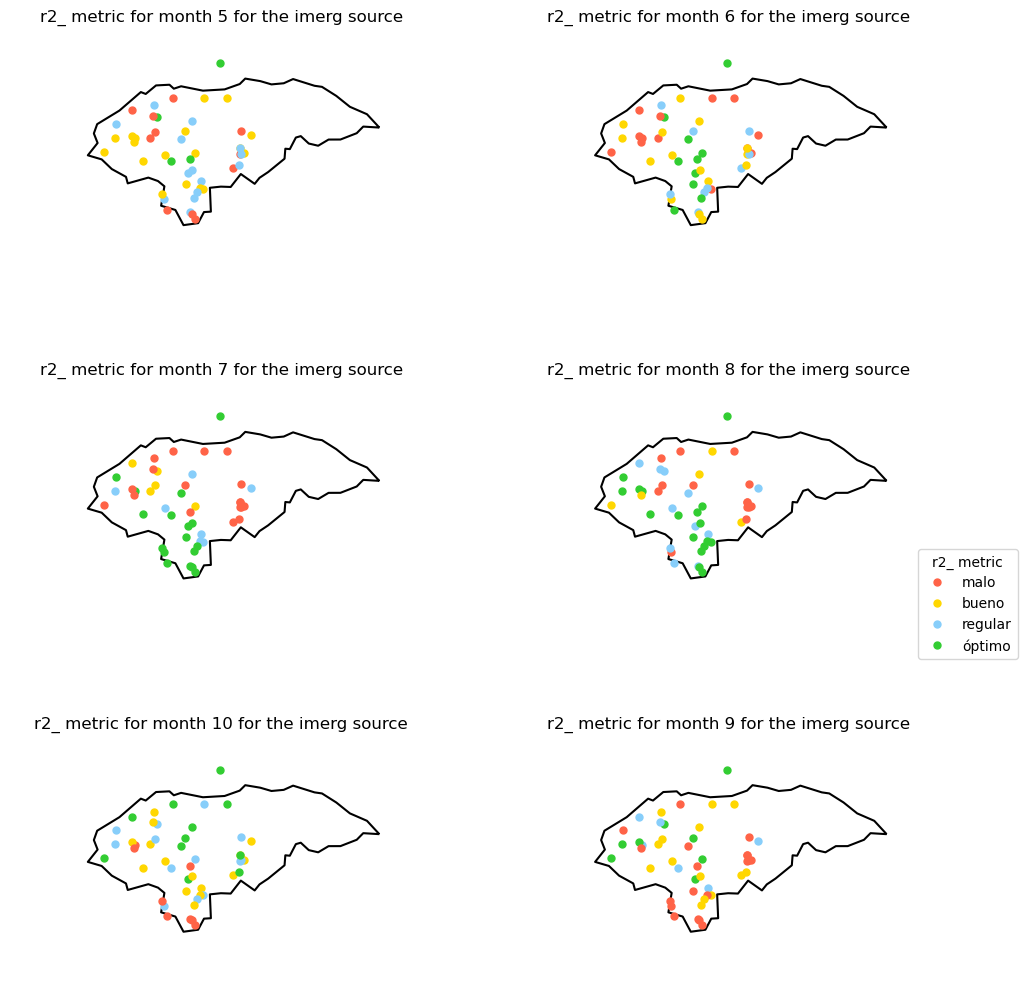

meses  secos (mswep)


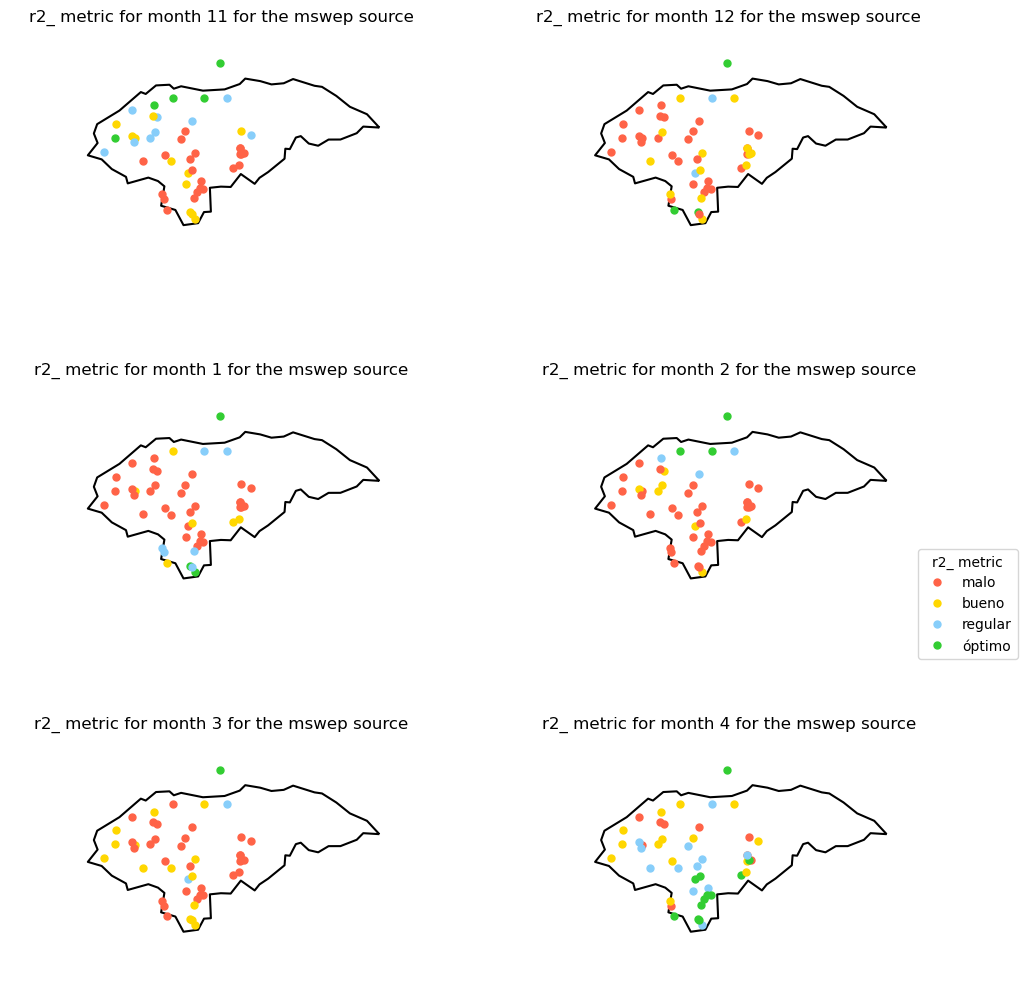

meses  lluvia (mswep)


<function matplotlib.pyplot.show(close=None, block=None)>

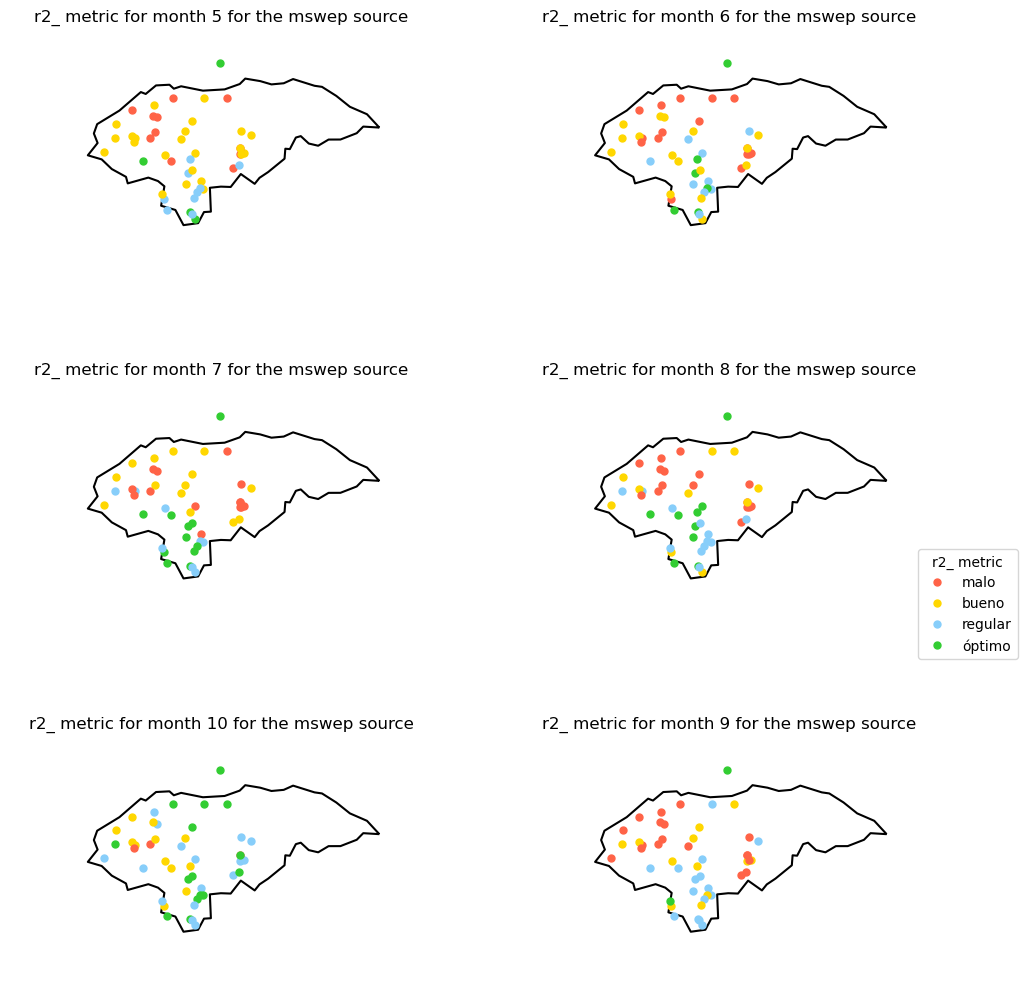

In [41]:
print(f"\033[1m{metrica}\033[0m")
print('meses secos (chirps)')
print("======================================================================================================================")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 11,'chirps', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 1,'chirps',  metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 12,'chirps',  metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 2,'chirps',  metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 3,'chirps',  metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 4,'chirps',  metrica,ranks)
plt.show()
print("======================================================================================================================")
print("======================================================================================================================")
print('meses lluviosos (chirps)')


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
hn = world.loc[world['iso_a3'] == 'HND']
fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 5,'chirps', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 7,'chirps', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 6,'chirps', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 8,'chirps', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 10,'chirps', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 9,'chirps', metrica,ranks)
plt.show()
print("======================================================================================================================")
print("======================================================================================================================")
print('meses secos (agera5)')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 11,'agera5', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 1,'agera5', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 12,'agera5', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 2,'agera5', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 3,'agera5', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 4,'agera5', metrica,ranks)
plt.show()

print("======================================================================================================================")
print("======================================================================================================================")
print('meses lluviosos (agera5)')


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
hn = world.loc[world['iso_a3'] == 'HND']
fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 5,'agera5', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 7,'agera5', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 6,'agera5', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 8,'agera5', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 10,'agera5', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 9,'agera5', metrica,ranks)
plt.show()
print("======================================================================================================================")
print("======================================================================================================================")
print('meses secos (imerg)')
# meses secos (imerg)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 11,'imerg', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 1,'imerg', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 12,'imerg', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 2,'imerg', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 3,'imerg', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 4,'imerg', metrica,ranks)
plt.show()

print("======================================================================================================================")
print("======================================================================================================================")
print('meses lluvia (imerg)')
# meses con lluvia

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

# crear una figura con cuatro subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 5,'imerg', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 7,'imerg', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 6,'imerg', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 8,'imerg', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 10,'imerg', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 9,'imerg', metrica,ranks)
plt.show()
print("======================================================================================================================")
print("======================================================================================================================")
print('meses  secos (mswep)')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 11,'mswep', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 1,'mswep', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 12,'mswep', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 2,'mswep', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 3,'mswep', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 4,'mswep', metrica,ranks)
plt.show()
print("======================================================================================================================")
print("======================================================================================================================")
print('meses  lluvia (mswep)')
# meses con lluvia


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

hn = world.loc[world['iso_a3'] == 'HND']

# crear una figura con cuatro subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 13))
map_metric_month_discrete(0, 0,info_monthly, 5,'mswep', metrica,ranks)
map_metric_month_discrete(1, 0,info_monthly, 7,'mswep', metrica,ranks)
map_metric_month_discrete(0, 1,info_monthly, 6,'mswep', metrica,ranks)
map_metric_month_discrete(1,1,info_monthly, 8,'mswep', metrica,ranks)
map_metric_month_discrete(2, 0,info_monthly, 10,'mswep', metrica,ranks)
map_metric_month_discrete(2,1,info_monthly, 9,'mswep', metrica,ranks)
plt.show